# PROJECT : HOUSE PRICE PREDICTION


## TASKS
### 1.Prepare a complete data analysis report on the given data.
### 2.a)Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.
### b) Determine the relationship between the house features and how the price varies based on this.
### 3.Come up with suggestions for the customer to buy the house according to the area, price and other requirements.

#### importing important libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### loading data set

In [7]:
data=pd.read_csv(r'C:\Users\USER PC\anaconda_projects\DataScience\project\data.csv')

In [9]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

### 1.Doing Important Basic Checks

In [12]:

data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [14]:
data.tail(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
print(data.shape)

(1460, 81)


In [20]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [22]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [24]:
data.describe(include='object')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

## -Insights From Above Dataset
### -There is total of 81 columns, 43 columns are categiorical and 38 are number value
### -The target variable here is SalePrice and there is average saleprice is 180922, maximum is 755000
### -Most house have road access of paved roads (which is suitable for town and cities it is durable too)
### -most occurring BldgType (dwelling type) is 1Fam which is a single family detached home
### -Most of the house have gable roof style are less cost and it style is design to meet cold and temperature climate
### -The foundation most houses uses poured concrete it is widely used for modern days
### -Prefer WD (warranty Deed-Standard property transfer with full ownership right) for most saletype
### -About 50 % of houses have full bath of 2 main fixtures like toilet, sink, bathtub

## 2.EDA(exploratory Data analysis)
#### -finding analysis from ploting diagrams using seaborn and matplotlib
#### - finding the distribution of features
#### -comparing with independent variables with target variable

### -Univariate Analysis

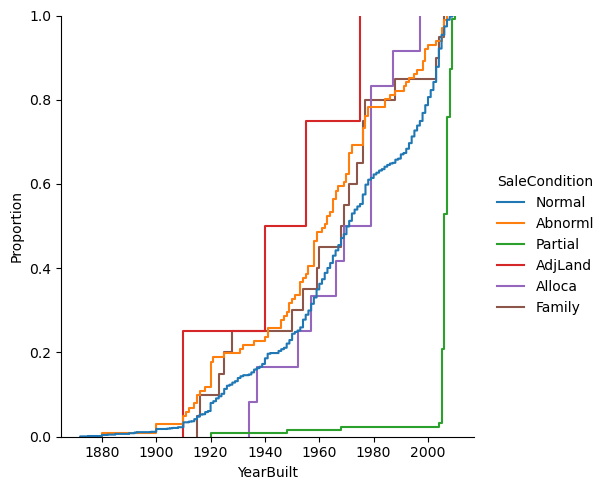

In [29]:
sns.displot(x=data['YearBuilt'],hue=data['SaleCondition'],kind='ecdf')

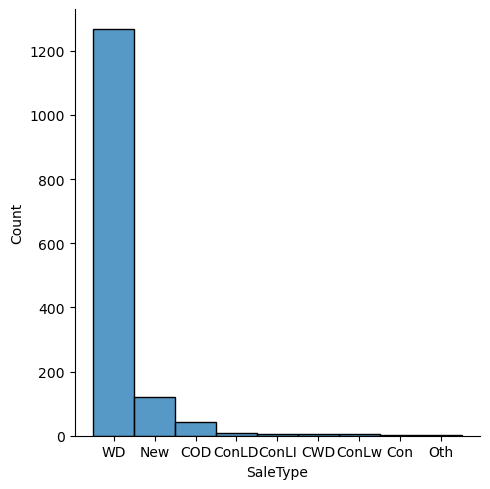

In [30]:
sns.displot(x=data['SaleType'])

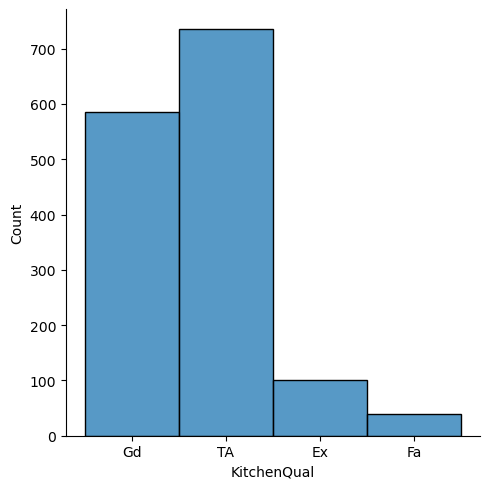

In [32]:
sns.displot(x=data['KitchenQual'])

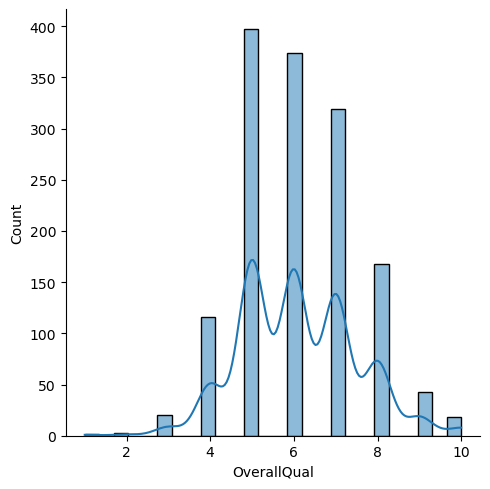

In [34]:
sns.displot(x=data['OverallQual'],kde=True)

In [36]:
data['OverallQual'].value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

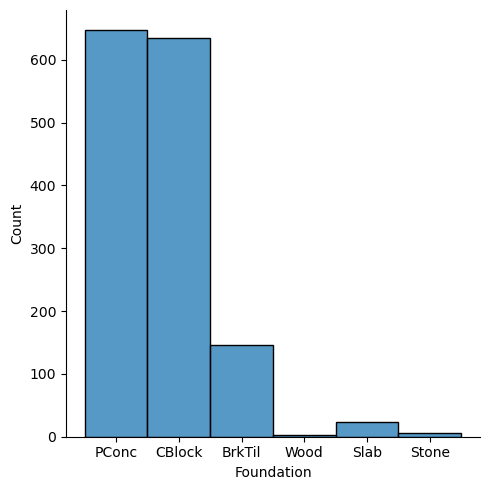

In [38]:
sns.displot(x=data['Foundation'])

<Axes: xlabel='BsmtQual', ylabel='count'>

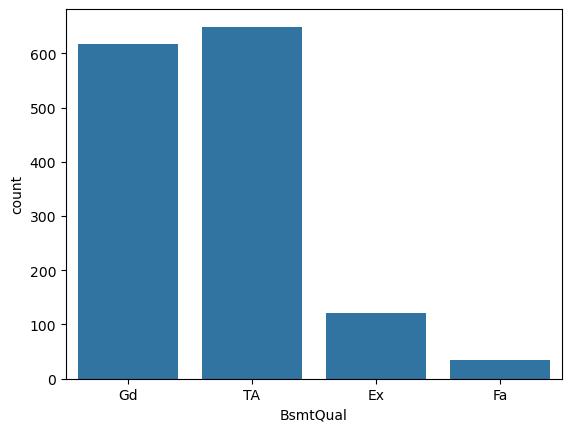

In [40]:
sns.countplot(x=data['BsmtQual'])

In [43]:
data['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

## Inference From Above Diagram
### Inference From Above Diagram
### -1. The distplot shows throughout the YearBuild(original construction date) with saleconditon of houses, it shows there is a cumulative upward           motion of normal salecondition which show the positive relationship between YearBuild and salecondition.
### -2. The most SaleType prefered is WD (Warrenty Deed) about 90 % prefer this type.
### -3. More than 700 house have average kitchen quality and about 600 have good level of kitchen quality
### -4. There is not that much low and high overall quality of material in houses in the range of (5-7) rate which show good quality in dataset
### -5. Most houses in data show PConc (poured concrete) is used for foundation and widely CB block too
### -6. Diagram show the Bsmtqual (height of the basement) is mostly Typically (80-89 inches) about 649 houses and good (90-99 inches) for 618 houses

### -Bivariate analysis

<Axes: xlabel='YrSold', ylabel='SalePrice'>

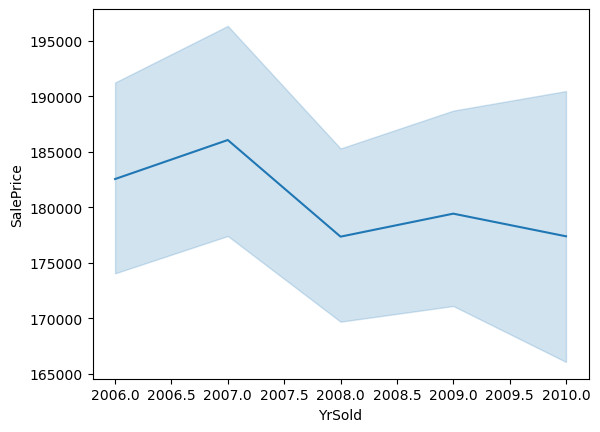

In [47]:
sns.lineplot(x=data['YrSold'],y=data['SalePrice'])

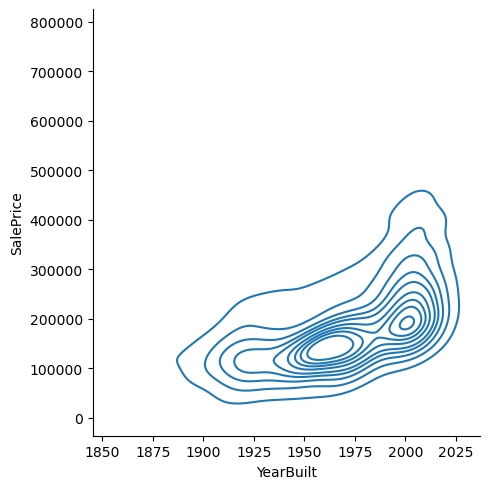

In [48]:
sns.displot(x=data['YearBuilt'],y=data['SalePrice'],kind='kde')

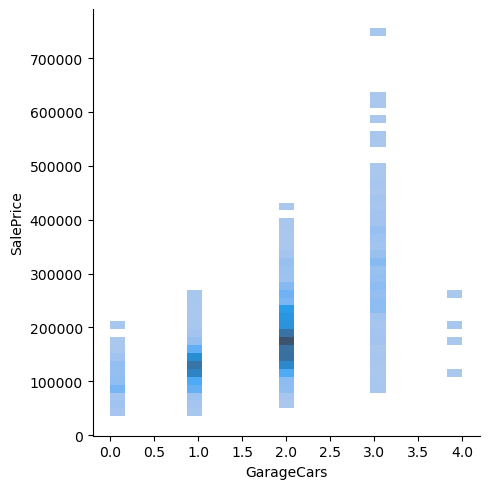

In [50]:
sns.displot(x=data['GarageCars'],y=data['SalePrice'])

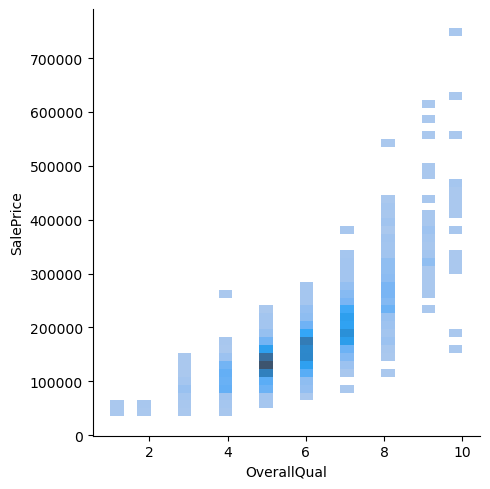

In [51]:
sns.displot(x=data['OverallQual'],y=data['SalePrice'],kind='hist')

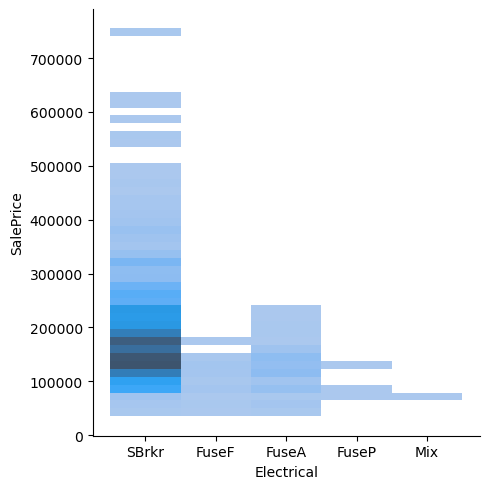

In [52]:
sns.displot(x=data['Electrical'],y=data['SalePrice'],kind='hist')

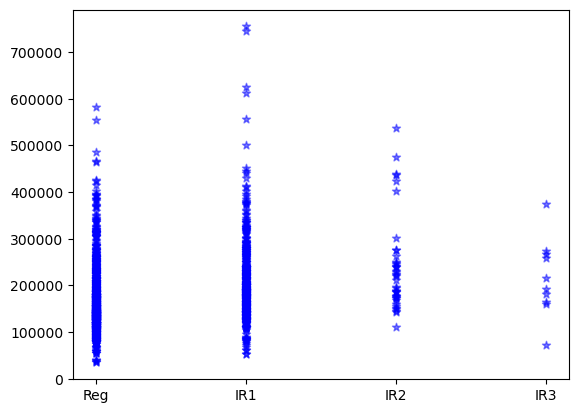

In [53]:
x=data['LotShape']
y=data['SalePrice']
plt.scatter(x,y,color='Blue',marker='*',alpha=0.5)

## -Inference From Bivariate Figure
### -1.diagram shows 2007 is taken place highest year sold as compared with saleprice
### -2.There is a relationship show in the diagram where the increase in yearBuild is significantly increase the SalePrice which new houses have high        sale value.
### -3.There is a upward relationship shows where size of garage car increases salepric
### -4.figure shows there is a increasing pattern where increasing overallQual (overall quality of material and finish) increase the saleprice of those       houses.
### -5.SBrkr (standard circuit breaker) is the most widely used electrical system in the dataset
### -6.There is high saleprice in  IR1 it is a slightly irregular shape of property (LotShape) 

## -Data Preprocessing

### -Checking Missing Values

In [61]:
nullcounts=data.isnull().sum()

In [63]:
#filtering nullvalue columns
nullcounts[nullcounts> 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### -There is some features have more than 80% of null value they are (Alley,PoolQC,Fence,MiscFeature). so they need to drop


In [67]:
data.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],inplace=True)

In [69]:
data.describe(include='object')

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
count          1460       1460       1460  ...        1460       1460   
unique           25          9          8  ...           4          7   
top           NAmes       Norm       Norm  ...          TA        Typ   
freq            225       1260       1445  ...         735       1360   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count          770       1379         1379       1379       1379       1460   
unique           5          6            3          5          5          3   
top             Gd     Attchd          Unf         TA         TA          Y   
freq           380        870          605       1311       1326       1340   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198  

[4 rows x 39 columns]

In [71]:
#checking mode of categorical data
for i in data.describe(include='object'):
    print(data[i].mode())

0    RL
Name: MSZoning, dtype: object
0    Pave
Name: Street, dtype: object
0    Reg
Name: LotShape, dtype: object
0    Lvl
Name: LandContour, dtype: object
0    AllPub
Name: Utilities, dtype: object
0    Inside
Name: LotConfig, dtype: object
0    Gtl
Name: LandSlope, dtype: object
0    NAmes
Name: Neighborhood, dtype: object
0    Norm
Name: Condition1, dtype: object
0    Norm
Name: Condition2, dtype: object
0    1Fam
Name: BldgType, dtype: object
0    1Story
Name: HouseStyle, dtype: object
0    Gable
Name: RoofStyle, dtype: object
0    CompShg
Name: RoofMatl, dtype: object
0    VinylSd
Name: Exterior1st, dtype: object
0    VinylSd
Name: Exterior2nd, dtype: object
0    BrkFace
Name: MasVnrType, dtype: object
0    TA
Name: ExterQual, dtype: object
0    TA
Name: ExterCond, dtype: object
0    PConc
Name: Foundation, dtype: object
0    TA
Name: BsmtQual, dtype: object
0    TA
Name: BsmtCond, dtype: object
0    No
Name: BsmtExposure, dtype: object
0    Unf
Name: BsmtFinType1, dtype: object


### - Found missing value in features look like there is numeric and most of them is categarical data

In [74]:
#impute with mode because of categorical features
for i in data.describe(include='object'):
    data[i].fillna(data[i].mode()[0],inplace=True)

In [76]:
#impute with median
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)

In [78]:
#checking null value again
nullcounts=data.isnull().sum()
nullcounts[nullcounts>0]

MasVnrArea      8
GarageYrBlt    81
dtype: int64

In [80]:
#there is two features have null value checking there data type
data.describe(include='number').T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      69.863699     22.027677     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      79.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [82]:
#impute with median
for i in ['MasVnrArea','GarageYrBlt']:
    data[i].fillna(data[i].median(),inplace=True)

In [84]:
#checking null again and show nothing which means there is no null value
nullcounts=data.isnull().sum()
nullcounts[nullcounts>0]

Series([], dtype: int64)

### -Checking Duplicates Values in Dataset


In [87]:
data.duplicated().sum()

0

## -Checking Outlier Using Boxplot

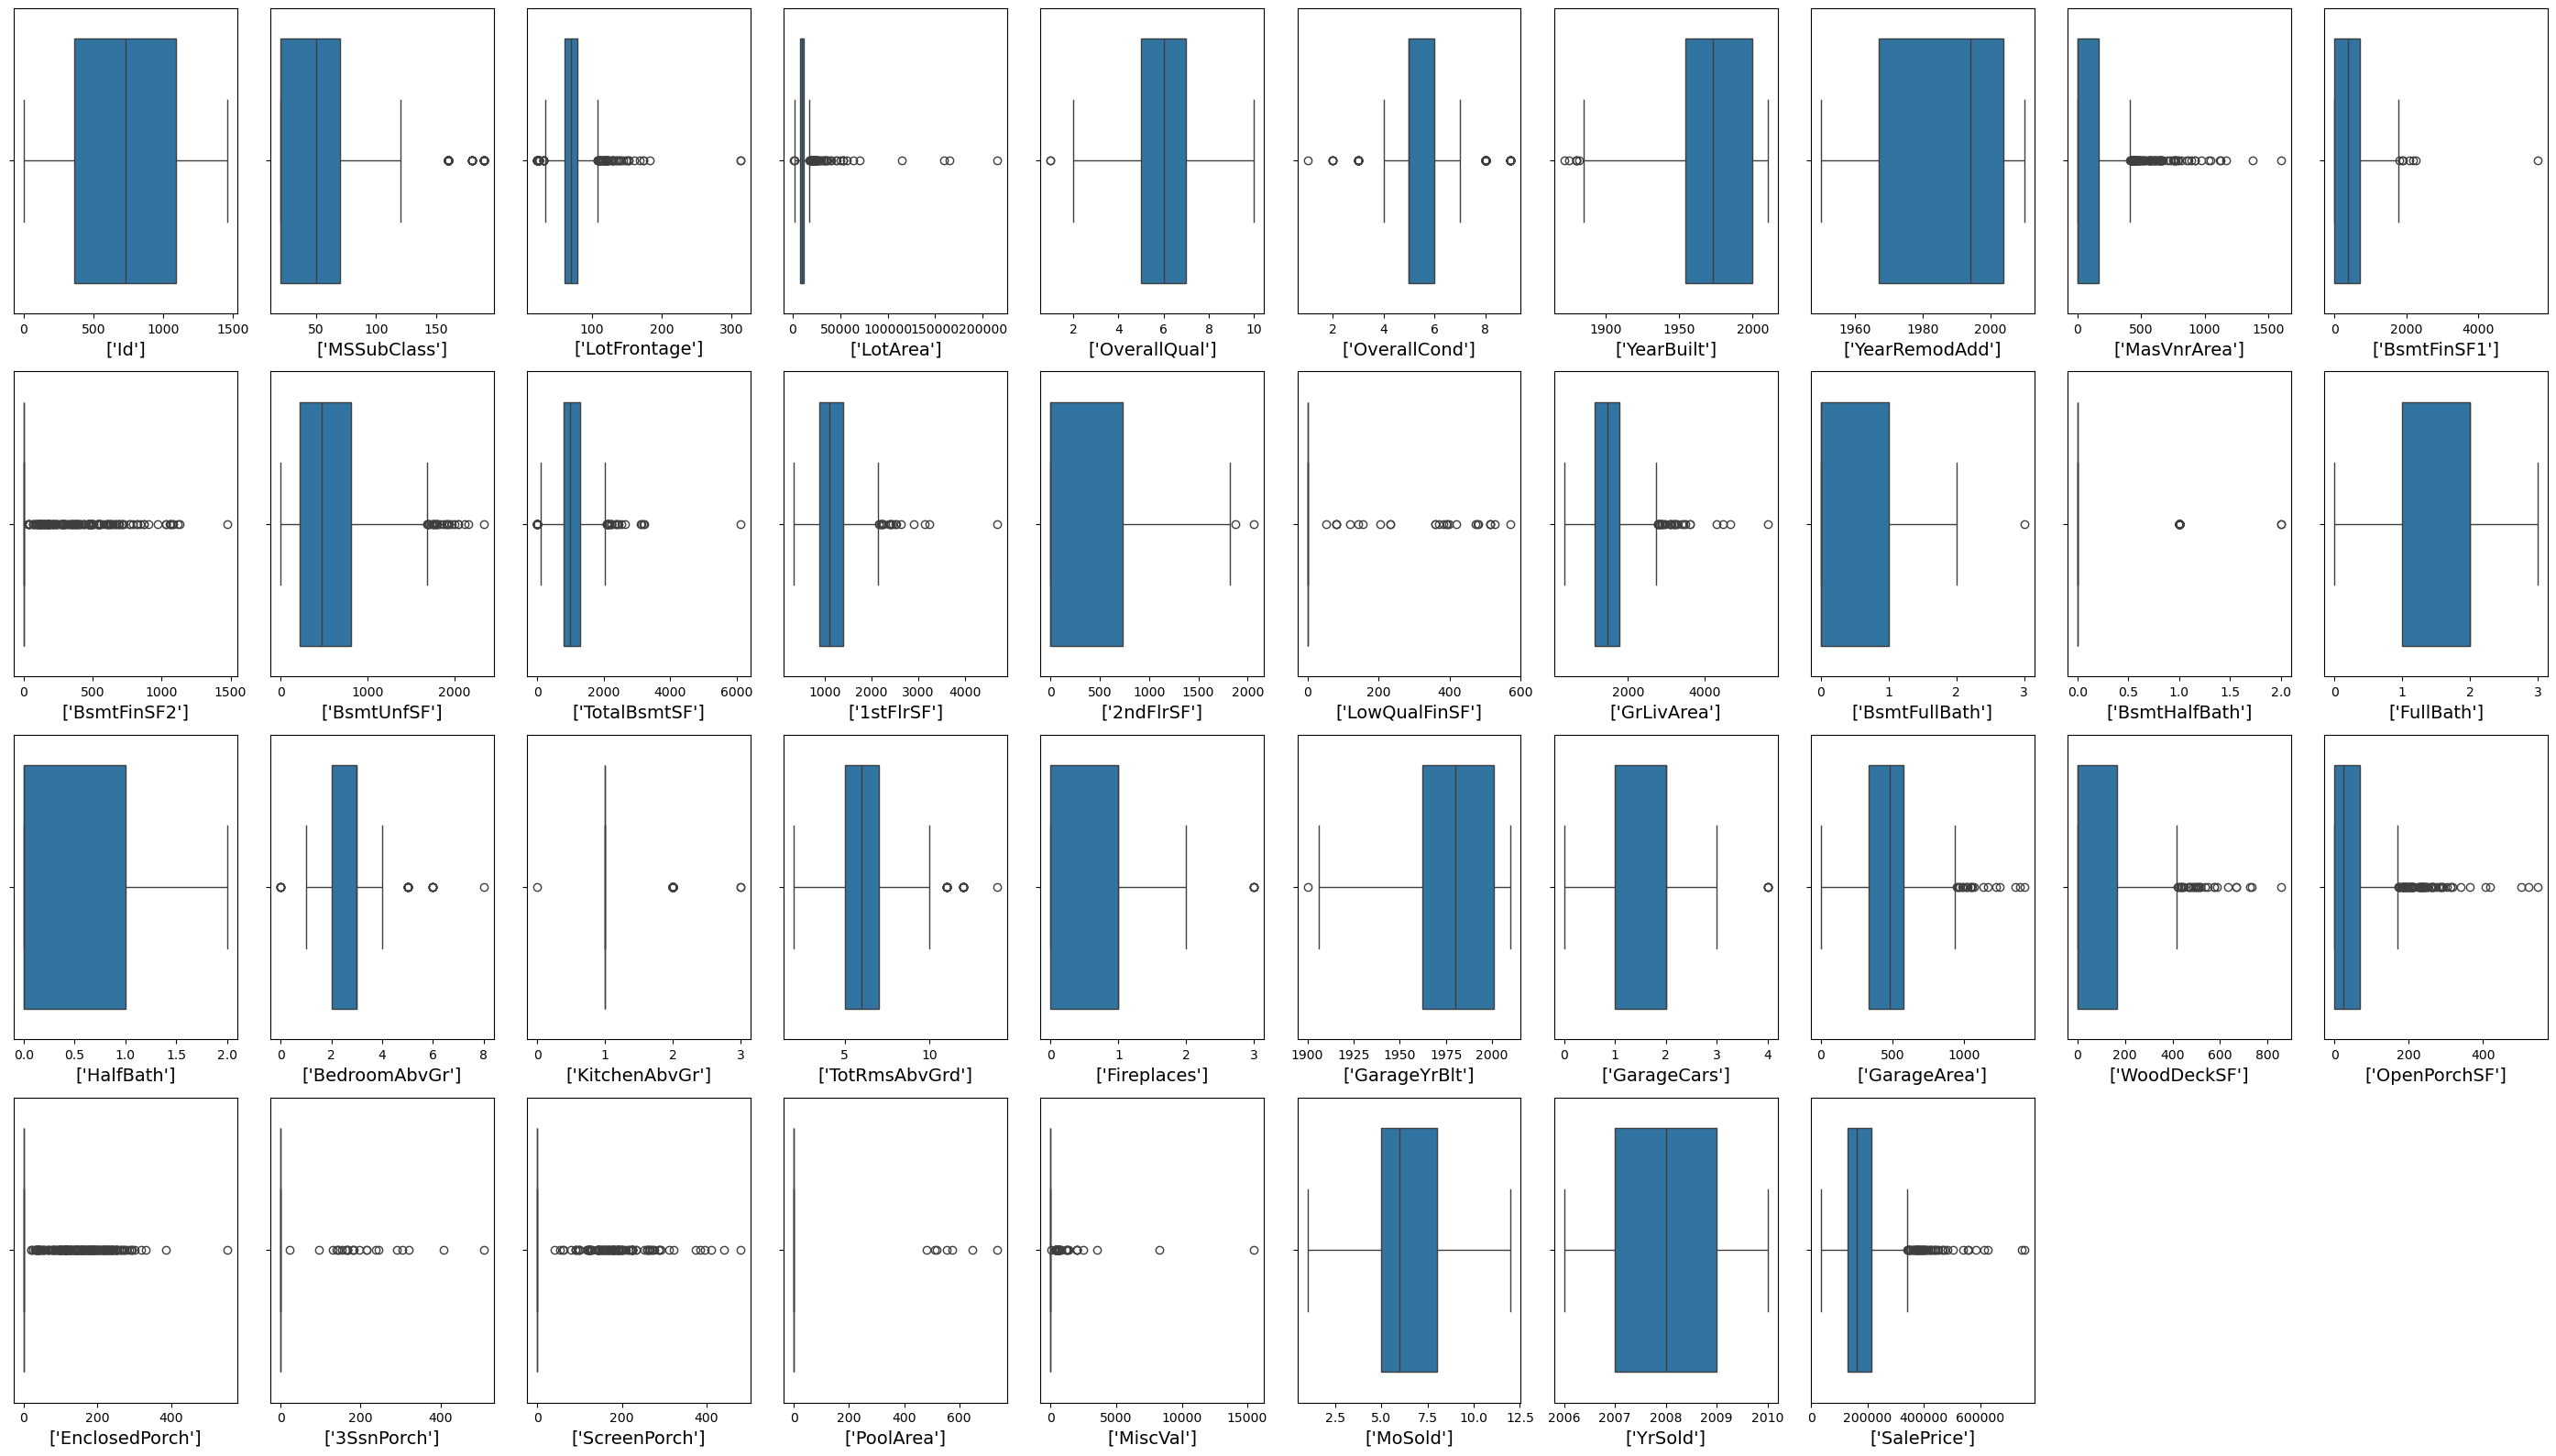

In [90]:
plt.figure(figsize=(28,16))
plotnum=1
for i in data.describe(include='number'):
    if plotnum<39:
        ax=plt.subplot(4,10,plotnum)
        sns.boxplot(x=data[i])
        plt.xlabel([i],fontsize=14)
    plotnum+=1
    plt.tight_layout()
    

#### -There is outliers in numdata, Non outlier observation are (MoSold,YrSold,HalfBath,FullBath,YearRemoAdd,Id)

In [92]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

### Replacing Outlier With Upperlimit and lowerlimit (IQR) method 

In [94]:
outlier_data=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces','GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice']    

In [95]:
for i in outlier_data:
    print(i)
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    print(f'Q1:{q1},Q3:{q3}')
    print(f'IQR:{iqr}')
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    print(f'UpperLimit:{upper},LowerLimit:{lower}')
    data[i]=np.where(data[i]>=upper,upper,
                     np.where(data[i]<=lower,lower,
                          data[i]))

MSSubClass
Q1:20.0,Q3:70.0
IQR:50.0
UpperLimit:145.0,LowerLimit:-55.0
LotFrontage
Q1:60.0,Q3:79.0
IQR:19.0
UpperLimit:107.5,LowerLimit:31.5
LotArea
Q1:7553.5,Q3:11601.5
IQR:4048.0
UpperLimit:17673.5,LowerLimit:1481.5
OverallQual
Q1:5.0,Q3:7.0
IQR:2.0
UpperLimit:10.0,LowerLimit:2.0
OverallCond
Q1:5.0,Q3:6.0
IQR:1.0
UpperLimit:7.5,LowerLimit:3.5
YearBuilt
Q1:1954.0,Q3:2000.0
IQR:46.0
UpperLimit:2069.0,LowerLimit:1885.0
MasVnrArea
Q1:0.0,Q3:164.25
IQR:164.25
UpperLimit:410.625,LowerLimit:-246.375
BsmtFinSF1
Q1:0.0,Q3:712.25
IQR:712.25
UpperLimit:1780.625,LowerLimit:-1068.375
BsmtFinSF2
Q1:0.0,Q3:0.0
IQR:0.0
UpperLimit:0.0,LowerLimit:0.0
BsmtUnfSF
Q1:223.0,Q3:808.0
IQR:585.0
UpperLimit:1685.5,LowerLimit:-654.5
TotalBsmtSF
Q1:795.75,Q3:1298.25
IQR:502.5
UpperLimit:2052.0,LowerLimit:42.0
1stFlrSF
Q1:882.0,Q3:1391.25
IQR:509.25
UpperLimit:2155.125,LowerLimit:118.125
2ndFlrSF
Q1:0.0,Q3:728.0
IQR:728.0
UpperLimit:1820.0,LowerLimit:-1092.0
LowQualFinSF
Q1:0.0,Q3:0.0
IQR:0.0
UpperLimit:0.0,LowerL

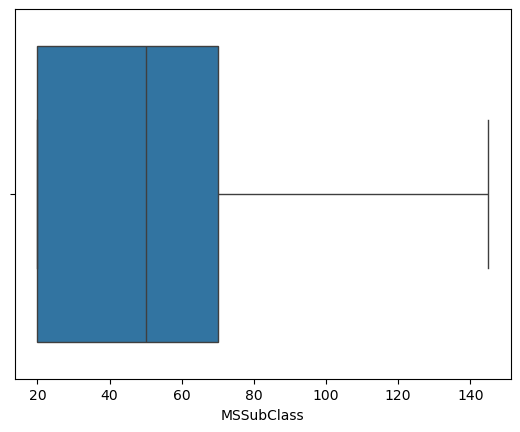

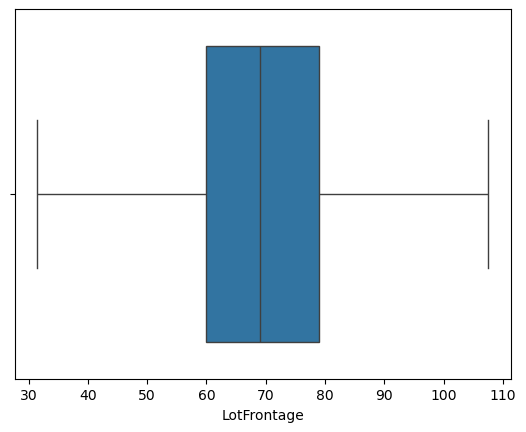

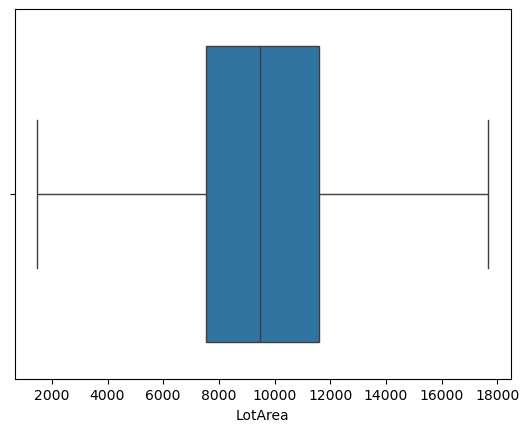

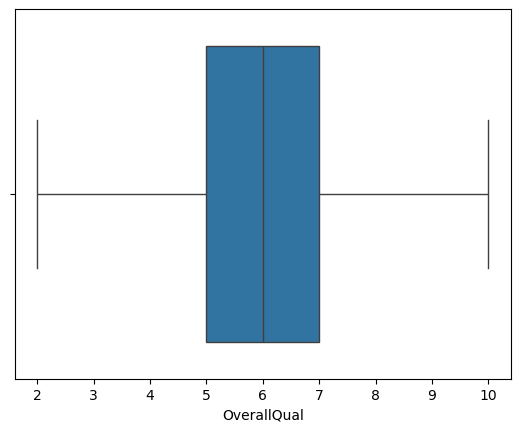

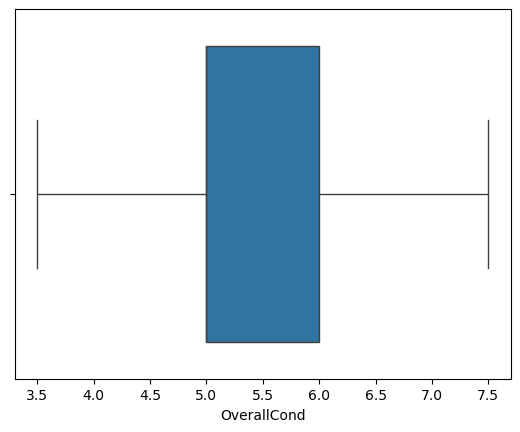

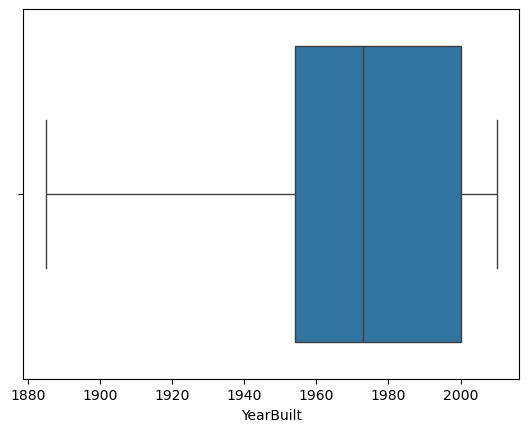

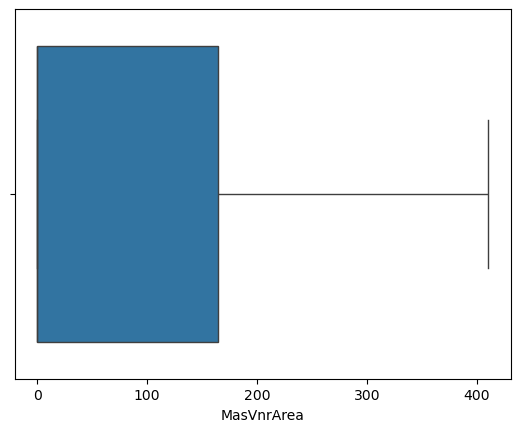

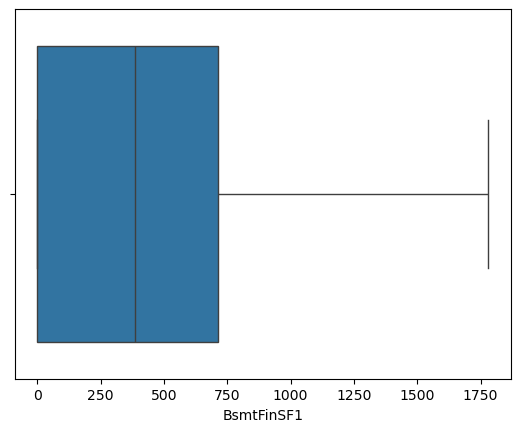

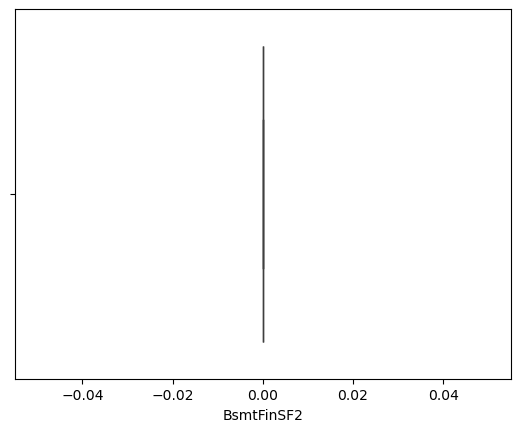

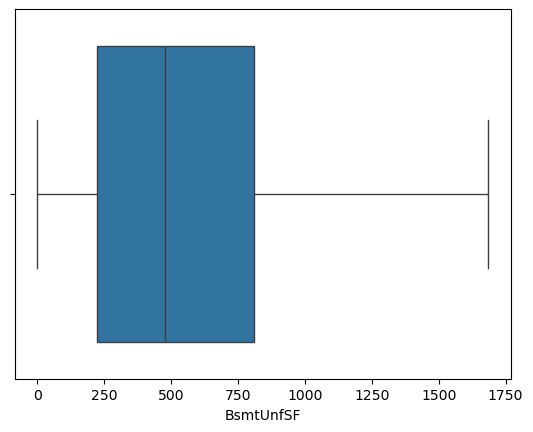

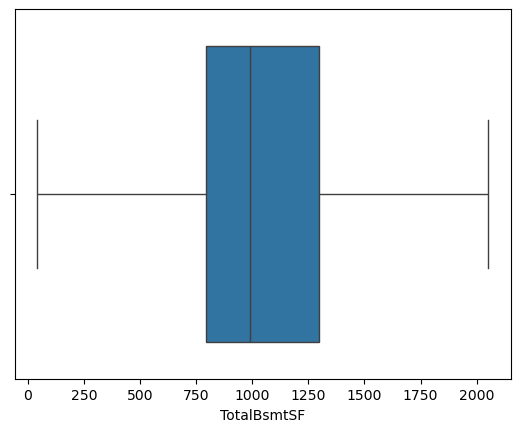

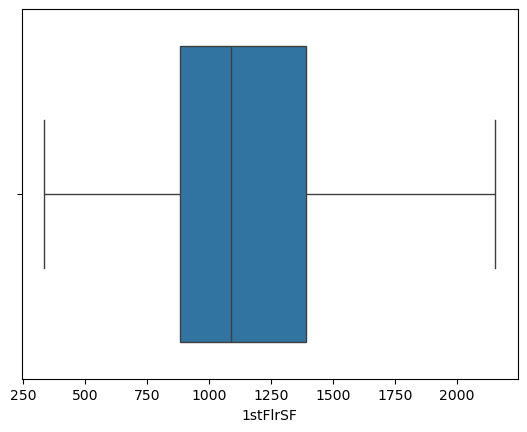

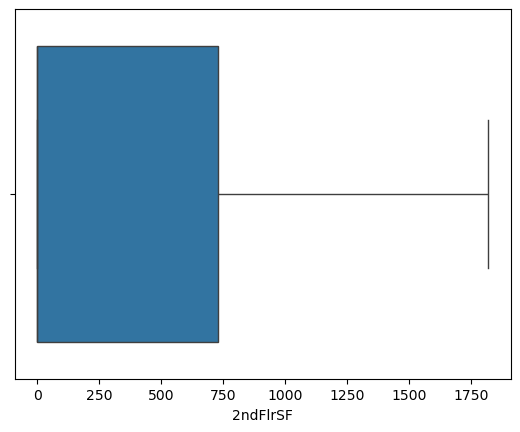

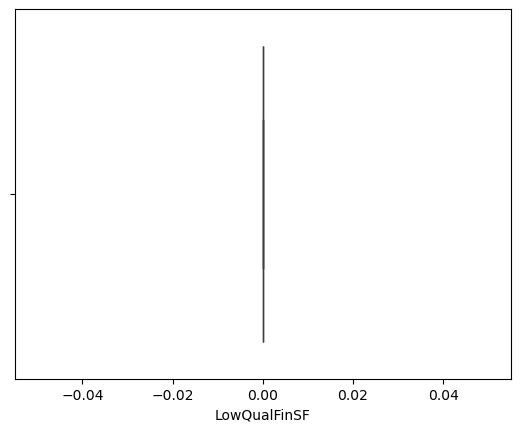

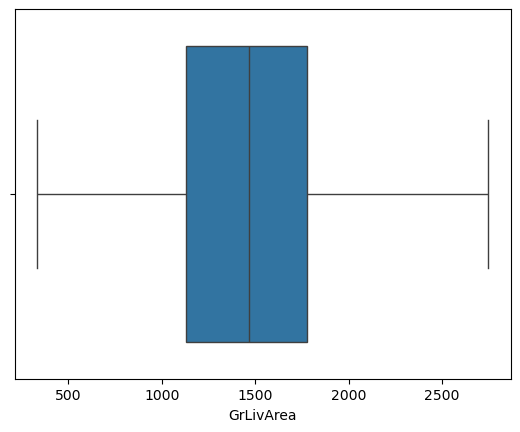

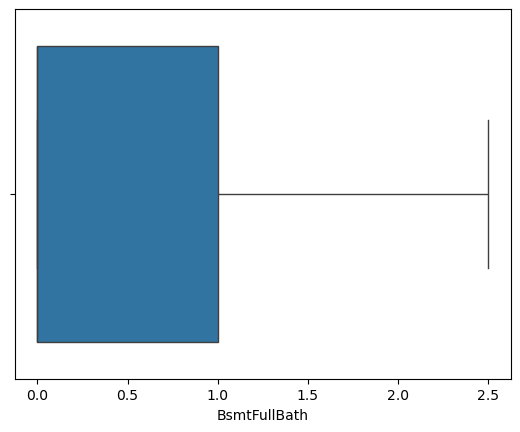

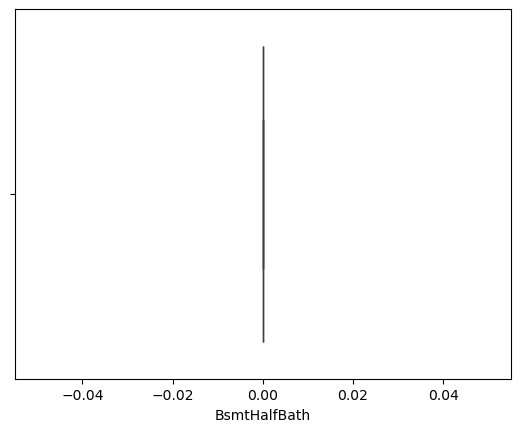

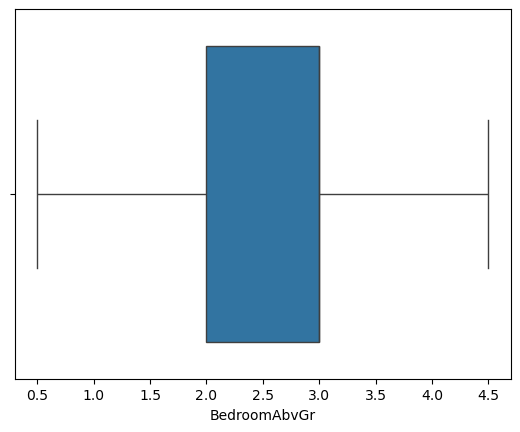

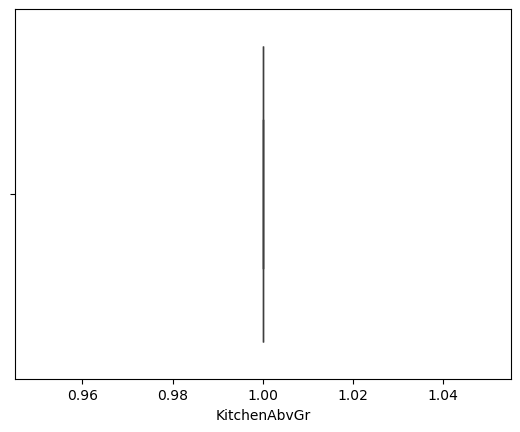

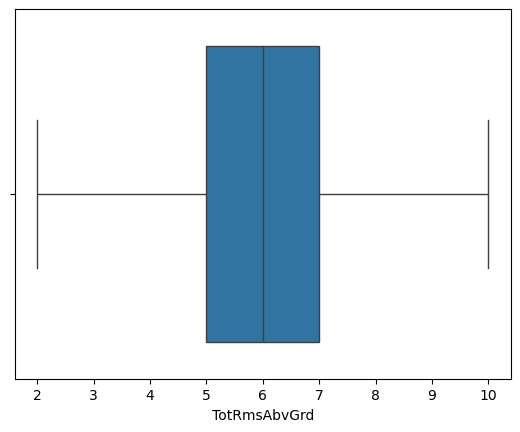

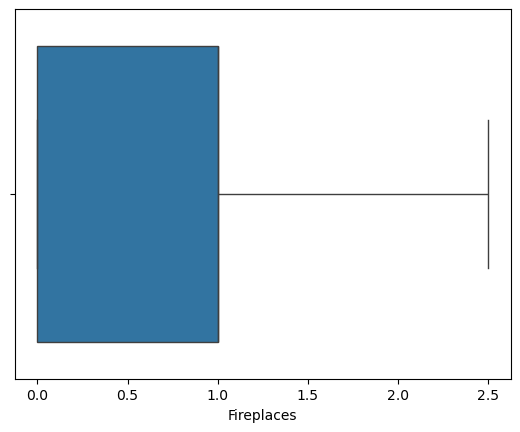

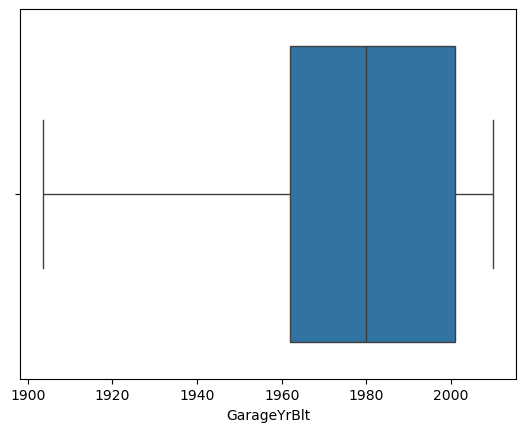

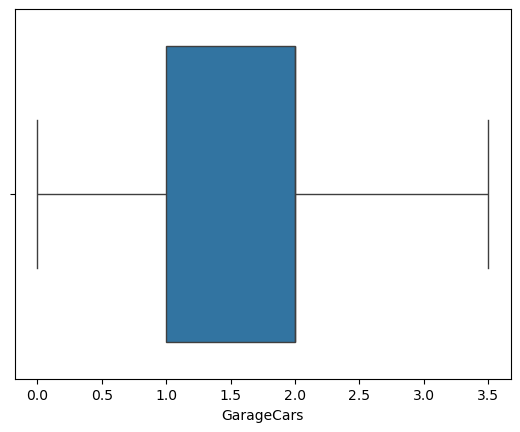

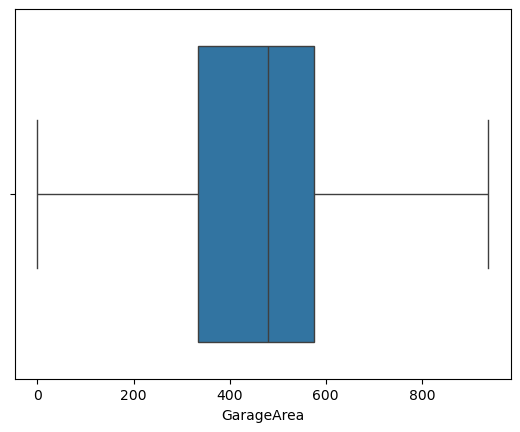

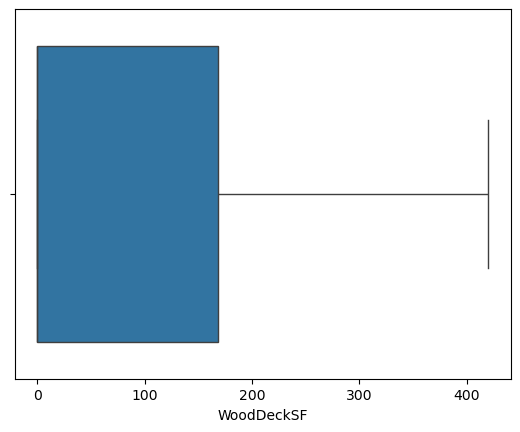

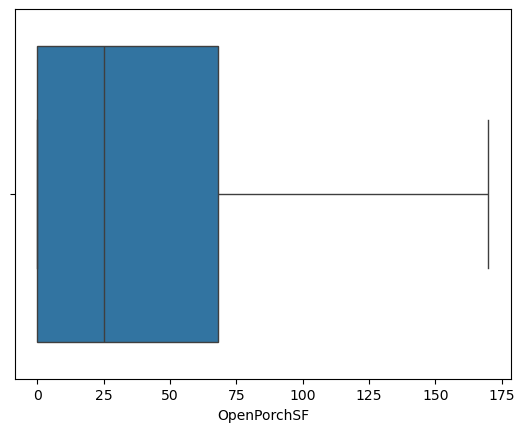

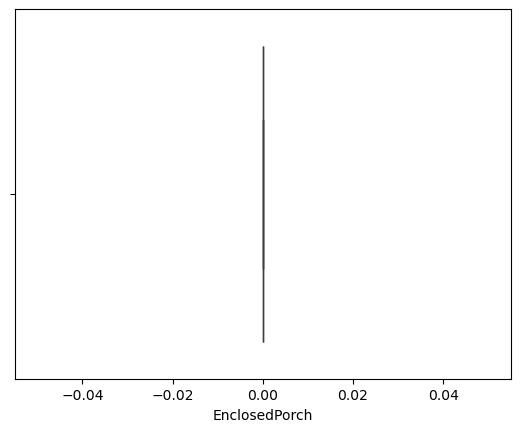

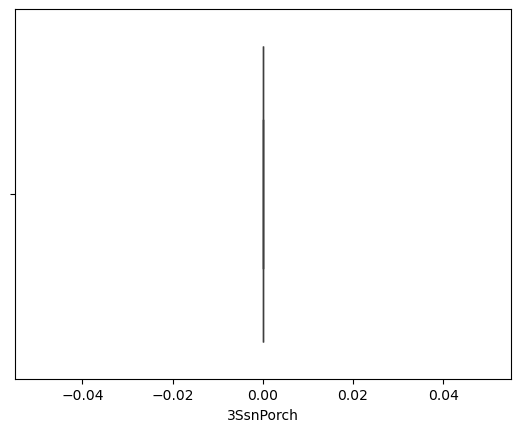

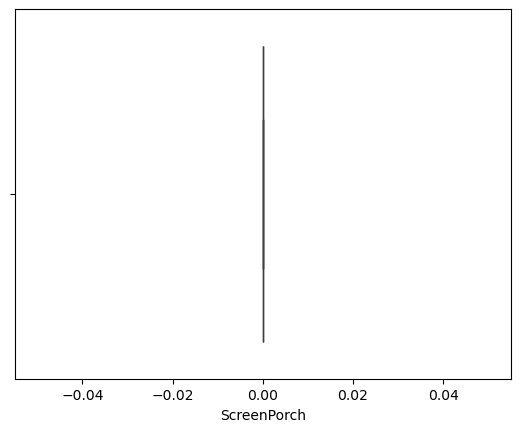

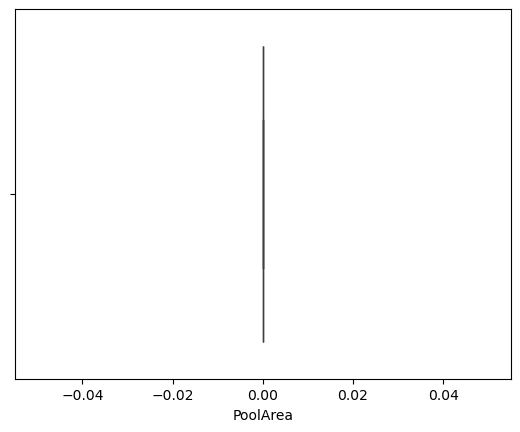

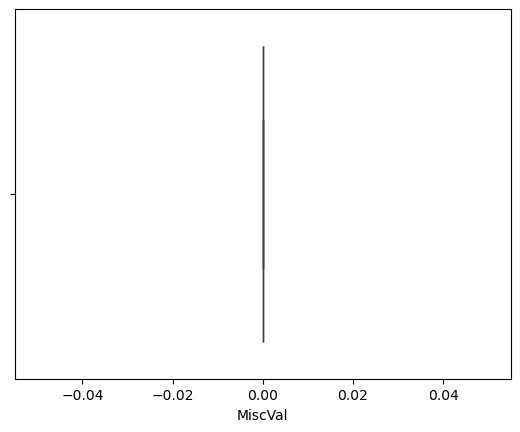

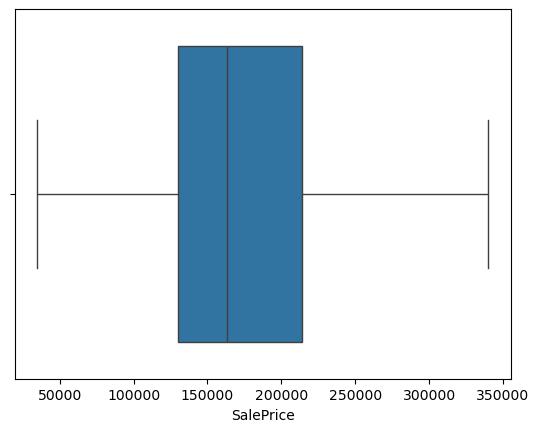

In [96]:
#checking outliers are imputed
for i in outlier_data:
    sns.boxplot(x=data[i])
    plt.show()

### Encoding The Categorical Data

In [98]:
data.describe(include='object')

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
count          1460       1460       1460  ...        1460       1460   
unique           25          9          8  ...           4          7   
top           NAmes       Norm       Norm  ...          TA        Typ   
freq            225       1260       1445  ...         735       1360   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count         1460       1460         1460       1460       1460       1460   
unique           5          6            3          5          5          3   
top             Gd     Attchd          Unf         TA         TA          Y   
freq          1070        951          686       1392       1407       1340   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198  

[4 rows x 39 columns]

### Checking categorical data

In [100]:
for i in data.describe(include='object'):
    print(i)
    print(data[i].unique())

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
Street
['Pave' 'Grvl']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

### look like Categorical data show different cardinallity The encoders are using :
#### -OneHot Encoding
MSZoning,
LotShape,
LandContour,
LotConfig,
LandSlope,
Condition1,
Condition2,
BldgType,
HouseStyle,
RoofStyle,
RoofMatl,
MasVnrType,
Foundation,
Heating,
Electrical,
Functional,
GarageType,
SaleType,
SaleCondition,
#### -Frequency Encoding
Neighborhood,
Exterior1st,
Exterior2nd
#### -Label encoding
Street,Utilities,CentralAir,PavedDrive
#### -Ordinal Encoding
ExterQual,
ExterCond,
BsmtQual,
BsmtCond,
BsmtExposure,
HeatingQC,
KitchenQual,
FireplaceQu,
GarageQual,
GarageCond,
GarageFinish,BsmtFinType1,
BsmtFinType2


In [102]:
data.describe(include='object')

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
count          1460       1460       1460  ...        1460       1460   
unique           25          9          8  ...           4          7   
top           NAmes       Norm       Norm  ...          TA        Typ   
freq            225       1260       1445  ...         735       1360   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count         1460       1460         1460       1460       1460       1460   
unique           5          6            3          5          5          3   
top             Gd     Attchd          Unf         TA         TA          Y   
freq          1070        951          686       1392       1407       1340   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198  

[4 rows x 39 columns]

#### -Importing OrdinalEncoder

In [104]:
#importing ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

In [105]:
ordinal_data=['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','GarageFinish','BsmtFinType1','BsmtFinType2']

In [106]:
#initialse
encoder=OrdinalEncoder()

In [107]:
#encoding into variable
ordinal_array=encoder.fit_transform(data[ordinal_data])

In [108]:
#creating dataframe for encodede data
ord_df=pd.DataFrame(ordinal_array,columns=encoder.get_feature_names_out(ordinal_data),index=data.index)


In [109]:
#removing original columns
data = data.drop(columns=ordinal_data)

In [110]:
#combining encoded dataframe into data( original)
data = pd.concat([data,ord_df], axis=1)

In [111]:
#importing onehot encoder
from sklearn.preprocessing import OneHotEncoder

In [112]:
onehot_data=['MSZoning','LotShape','LandContour','LotConfig','LandSlope','Condition1',
 'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','MasVnrType','Foundation','Heating',
 'Electrical','Functional','GarageType','SaleType','SaleCondition']

In [113]:
#intializing
encoder=OneHotEncoder(sparse_output=False)

In [114]:
#encoding onehot data 
one_array=encoder.fit_transform(data[onehot_data])

In [115]:
#creating dataframe
one_df=pd.DataFrame(one_array,columns=encoder.get_feature_names_out(onehot_data),index=data.index)

In [116]:
#droping onehot columns in original data
data=data.drop(columns=onehot_data)

In [117]:
# combining encoded onehot columns into data
data=pd.concat([data,one_df],axis=1)

In [118]:
#importing label encoder
from sklearn.preprocessing import LabelEncoder

In [119]:
label_data=['Street','Utilities','CentralAir','PavedDrive']

In [120]:
# encoding using for loop
for col in label_data:
    en= LabelEncoder()
    data[col] = en.fit_transform(data[col].astype(str))

In [121]:
freq_data=['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [122]:
# freq encoding using for loop
for col in freq_data:
    freq_map = data[col].value_counts().to_dict()
    data[col] = data[col].map(freq_map)

### Feature Enginerring

In [124]:
#droping unwanted column
data.drop('Id',axis=1,inplace=True)

### Finding correlation using Heatmap

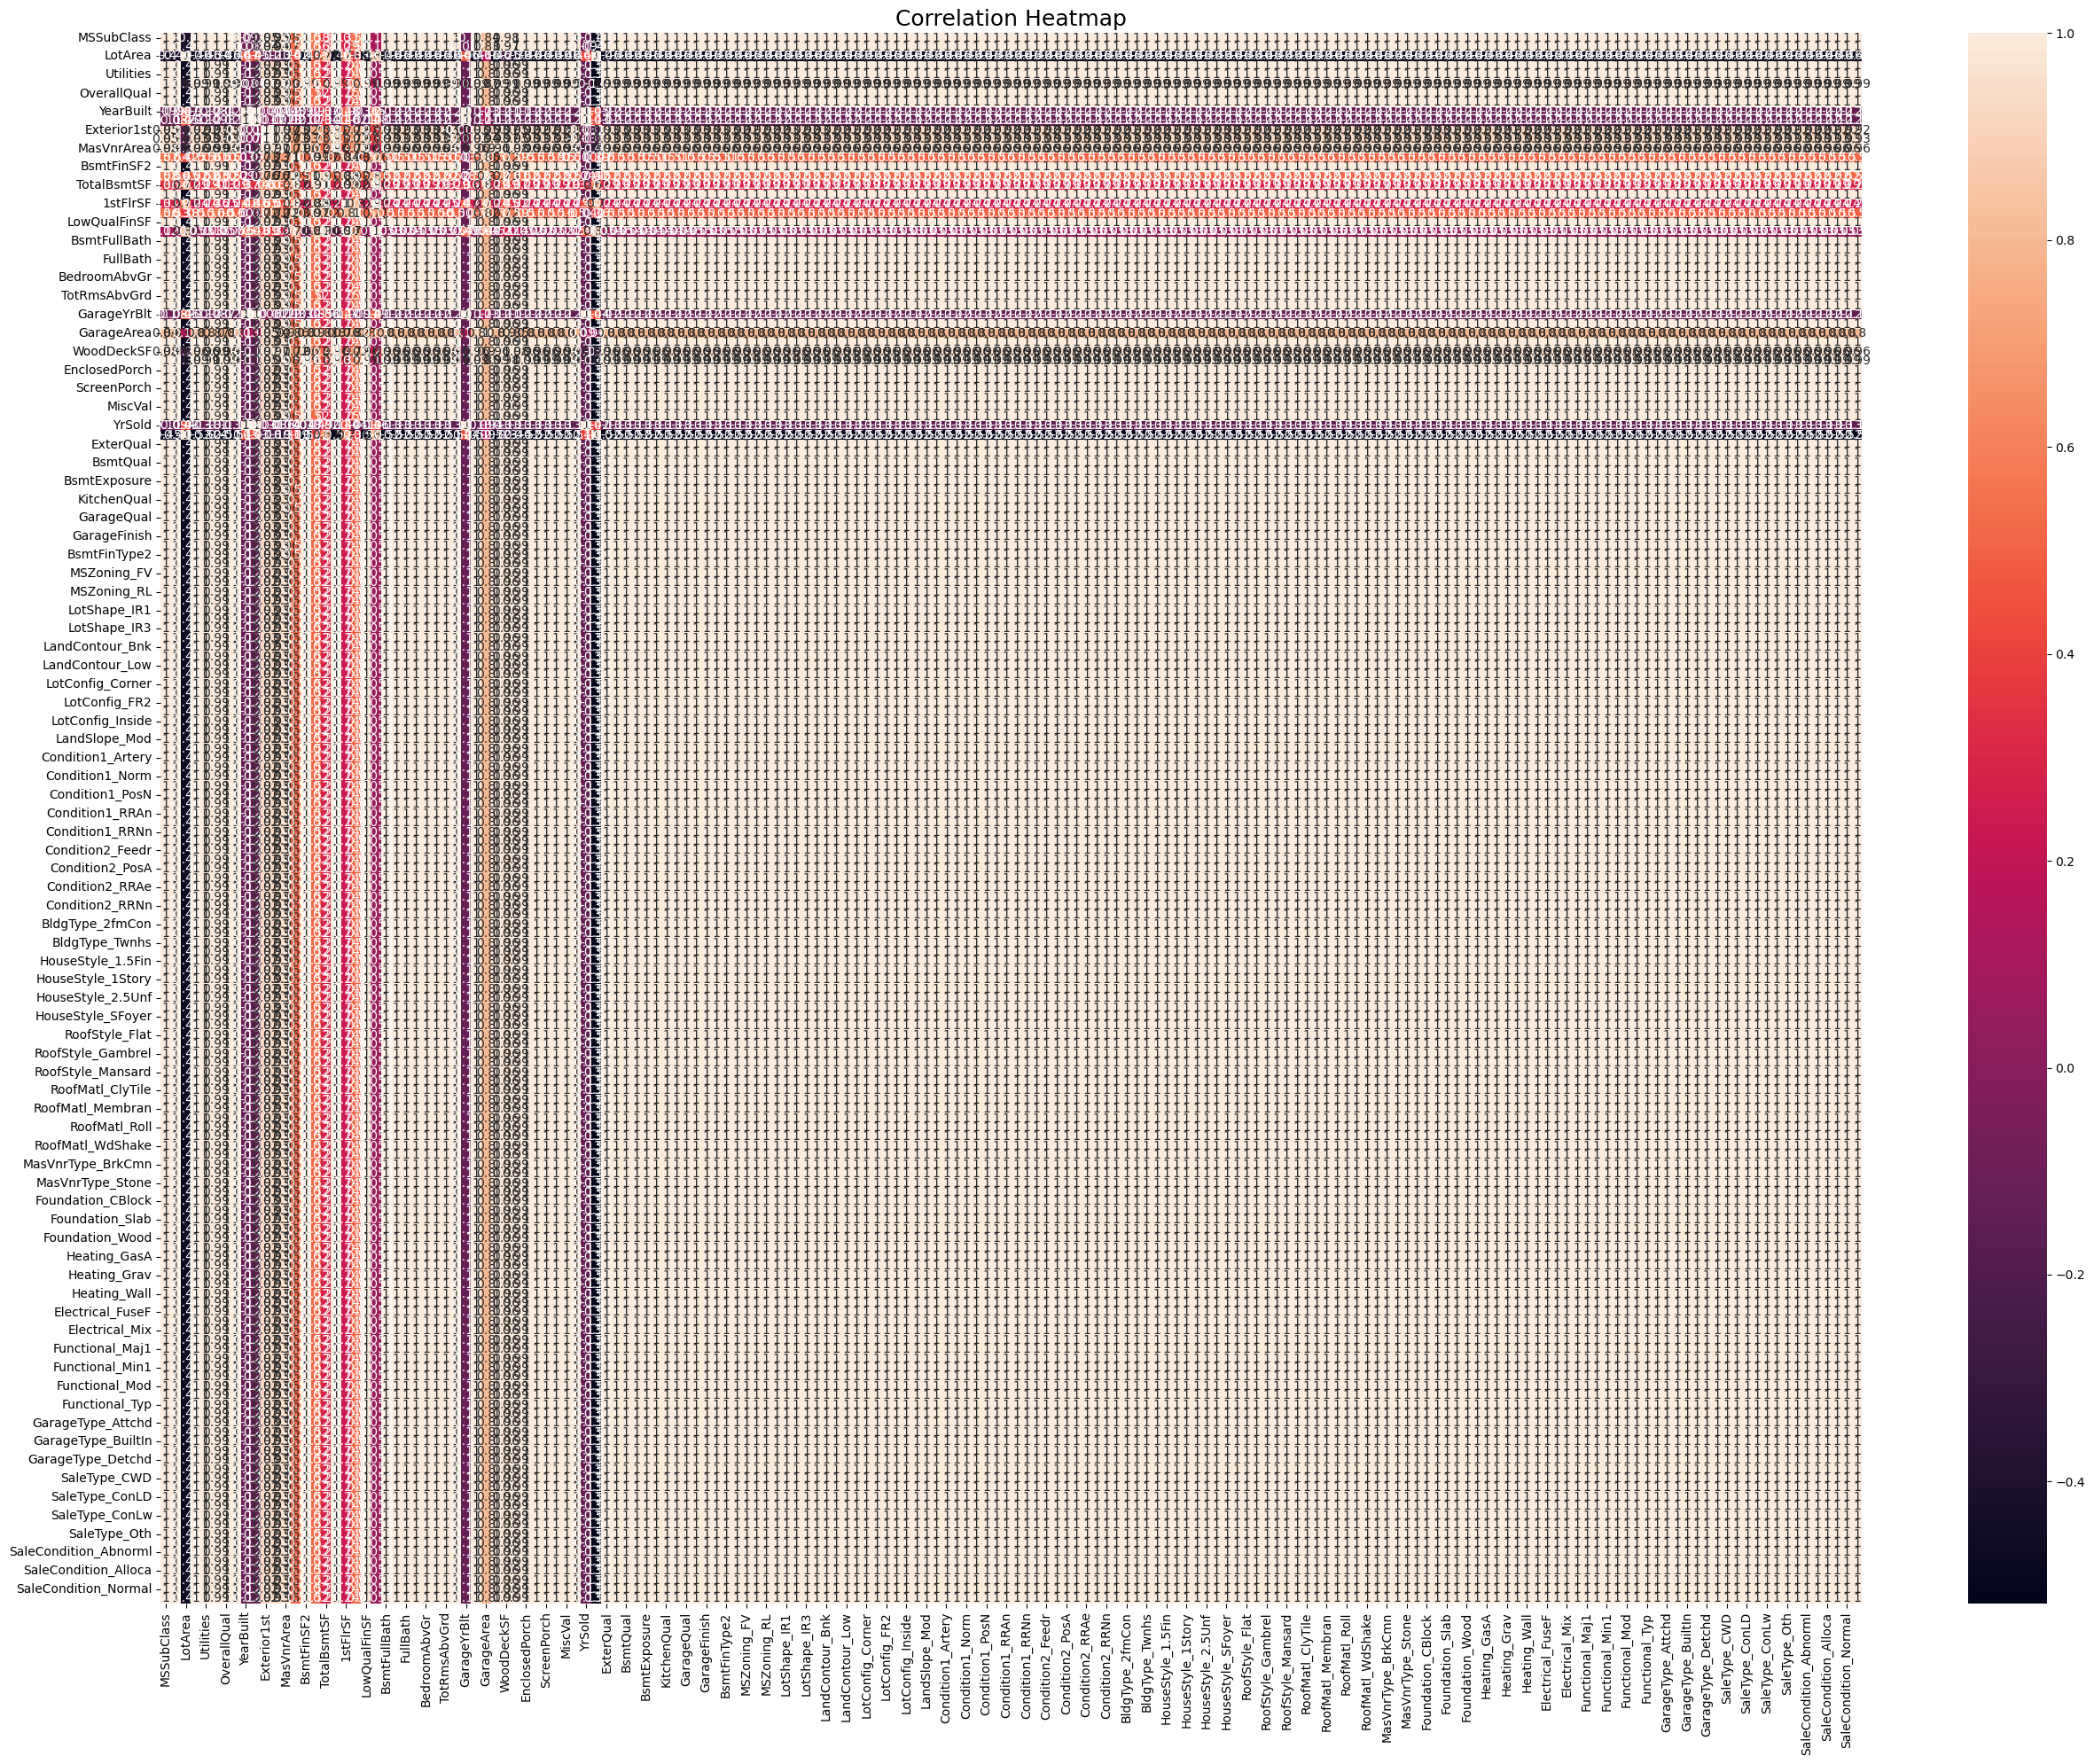

In [126]:
plt.figure(figsize=(26, 20)) 
corr=data.describe().corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap', fontsize=18)
plt.tight_layout()
plt.show()

In [127]:
#checking saleprice (target variable) is present in data
print('SalePrice'in data)

True


In [128]:
# Calculate correlation 
corr_matrix = data.corr().abs()

In [133]:
# Select upper triangle of correlation matrix
upper=corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [134]:
# Find index of feature columns with correlation greater than 0.8
high_corr=[(col1, col2, corr_matrix.loc[col1, col2])
             for col1 in upper.columns
             for col2 in upper.columns
             if upper.loc[col1, col2] > 0.8]

In [135]:
# Print highly correlated pairs
for pair in high_corr:
    print(f"{pair[0]} and {pair[1]} => correlation: {pair[2]:.2f}")

MSSubClass and BldgType_1Fam => correlation: 0.81
OverallQual and SalePrice => correlation: 0.82
Exterior1st and Exterior2nd => correlation: 0.95
TotalBsmtSF and 1stFlrSF => correlation: 0.81
2ndFlrSF and HouseStyle_2Story => correlation: 0.81
GrLivArea and TotRmsAbvGrd => correlation: 0.84
GarageCars and GarageArea => correlation: 0.89
MSZoning_RL and MSZoning_RM => correlation: 0.81
LotShape_IR1 and LotShape_Reg => correlation: 0.93
LandSlope_Gtl and LandSlope_Mod => correlation: 0.91
RoofStyle_Flat and RoofMatl_Tar&Grv => correlation: 0.83
RoofStyle_Gable and RoofStyle_Hip => correlation: 0.93
MasVnrType_BrkFace and MasVnrType_Stone => correlation: 0.94
Electrical_FuseA and Electrical_SBrkr => correlation: 0.86
GarageType_Attchd and GarageType_Detchd => correlation: 0.82
SaleType_New and SaleCondition_Partial => correlation: 0.99


#### look like these features have highcorrelation with each other and Droping the one of less affecting feature from all combination

In [161]:
drop_cols=['MSSubClass','Exterior2nd','1stFlrSF','HouseStyle_2Story','GrLivArea','GarageArea','MSZoning_RM','LotShape_Reg','LandSlope_Mod',
'RoofMatl_Tar&Grv','RoofStyle_Gable','MasVnrType_BrkFace', 'Electrical_FuseA','GarageType_Detchd','SaleCondition_Partial']

In [162]:
#droping from data
data=data.drop(drop_cols,axis=1)

### Model Creation

In [172]:
#importing important modules
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [174]:
#splitting independent and target 
x=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [176]:
#spliting data for training and spliting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
x_test.shape

(438, 154)

### -Scaling the train and test data

In [179]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### -Training and predicting the data using Linear Regression Model

In [182]:
model_linear=LinearRegression()
model_linear.fit(x_train_scaled, y_train)
#Predict and evaluate R²
y_pred=model_linear.predict(x_test_scaled)
y_pred

array([190061.81570349, 175825.03605772, 280956.35569165, 170955.44378663,
       258574.12936878,  78367.78711755, 156920.97610699,  96869.37914153,
       116079.26819849, 213317.25832153,  95015.61436628, 263536.74232055,
       197657.40205487,  86592.48875608, 153411.02366499, 277576.1651663 ,
       170974.58374047, 294123.30320734, 371170.57503082, 168548.02921366,
       201185.5977665 , 174285.04854495, 132310.61072722, 144095.28412001,
       204926.71373284, 127108.76519041, 253338.75467817, 188472.3073857 ,
       145640.18602915, 188223.13732667, 119350.77451615, 251430.79819141,
       161121.45786447, 150828.51639861, 164461.59493902, 149518.75029996,
       182456.25151009, 289848.14101452, 197768.61537188, 295932.01652146,
        80086.54895939, 123758.24681355, 134948.31613629, 178762.28622494,
        72321.89592306,  76878.1890977 , 244948.73580577, 278858.84434799,
       164290.03126742, 200446.46993303, 222501.73132999, 174899.54907387,
       163302.57193578, 1

### -Checking CVr2_score

In [185]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
cv_r2_scores = cross_val_score(model_linear,x,y,cv=5,scoring='r2')
print(cv_r2_scores.mean())

0.8609234570325206


In [187]:
adj_r2=1-(1-0.8609234570325206)*(438-1)/(438-154-1)
print(adj_r2)

0.7852422287039276


### -look like overfitting because there is vast different between r2_score and adj_r2
### -Even droping multicollinerity data doesnot making change, there must include some non-infomative features
### -Need to do reduce and choose important features for that using LassoCv

In [190]:
#importing lassoCV
from sklearn.linear_model import LassoCV

In [192]:
#model training
lasso= LassoCV(cv=5, random_state=42)
lasso.fit(x_train_scaled, y_train)

LassoCV(cv=5, random_state=42)

In [425]:
#finding coeffcient
lasso.coef_

154

In [423]:
#selecting features (important)
selected_features = x.columns[(lasso.coef_ != 0)]
print("Selected Features (Non-zero Coefficients):",selected_features)

Selected Features (Non-zero Coefficients): Index(['LotFrontage', 'LotArea', 'Street', 'Neighborhood', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'KitchenQual', 'GarageFinish', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LandSlope_Gtl', 'Condition1_Artery', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition2_Norm',
       'Condition2_PosN', 'BldgType_1Fam', 'HouseStyle_1.5Fin',
       'RoofStyle_Gambrel', 'RoofMatl_ClyTile', 'RoofMatl_WdShngl',
       'MasVnrType_BrkCmn', 'Foundation_BrkTil', 'Foundation_PConc',
       'Foundation_Slab', 'Heating_Floor', 'Heating_OthW', 'Heating_Wall',
       'Functional_Maj

In [198]:
y_pred=lasso.predict(x_test_scaled)
y_pred

array([191669.80735742, 175484.61636121, 266539.31478844, 174105.84926227,
       254267.21980358,  81045.70206723, 150181.02528184,  91360.94532364,
       112229.46345966, 210435.21377394, 105183.64431599, 258302.11359201,
       197998.67290347,  84264.35037163, 161364.21237245, 277064.07437567,
       181289.41430067, 292686.17323726, 358551.19139825, 174176.0015233 ,
       198334.85078715, 180233.00799375, 131294.14982604, 143761.68658635,
       195162.52409129, 124956.53642359, 243559.54816224, 193426.24590079,
       147898.22740847, 196573.86060841, 114234.06071902, 250771.21461943,
       160628.16613378, 157355.34822739, 159278.7020066 , 138636.62480675,
       180572.55145887, 265656.48610401, 201906.96024484, 282697.59985094,
        78950.87224725, 125690.76934078, 132840.18542704, 178140.97009207,
        79301.82565588,  69395.64671653, 242930.9315629 , 275456.57431401,
       156915.70316524, 203949.14664606, 209342.98928252, 202260.94204717,
       164628.512383  , 1

In [200]:
#scaling the x data
x_scaled=scaler.fit_transform(x)

In [202]:
cv_r2_scores = cross_val_score(lasso, x_scaled, y, cv=5, scoring='r2')
print(cv_r2_scores.mean())

0.8688403481414388


In [203]:
print(x_test.shape)

(438, 154)


In [204]:
n=len(selected_features)
n

65

### Here n=438, p=65

In [443]:
#finding adjusted R2
adj_r2_linear=1-(1-0.8688403481414388)*(438- 1)/(438-65-1)
print(f"Adjusted R²:{adj_r2_linear}")

Adjusted R²:0.8459226670371204


In [435]:
#model evalution using mean_squared and rmse
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(f'MAE:{mae}')
print(f'MSE:{mse}')
print(f'RMSE:{rmse}')

MAE:16916.7743293379
MSE:560955801.6839708
RMSE:23684.50551909351


### - Using Residual to plot for predicted and errors (actual-predicted)

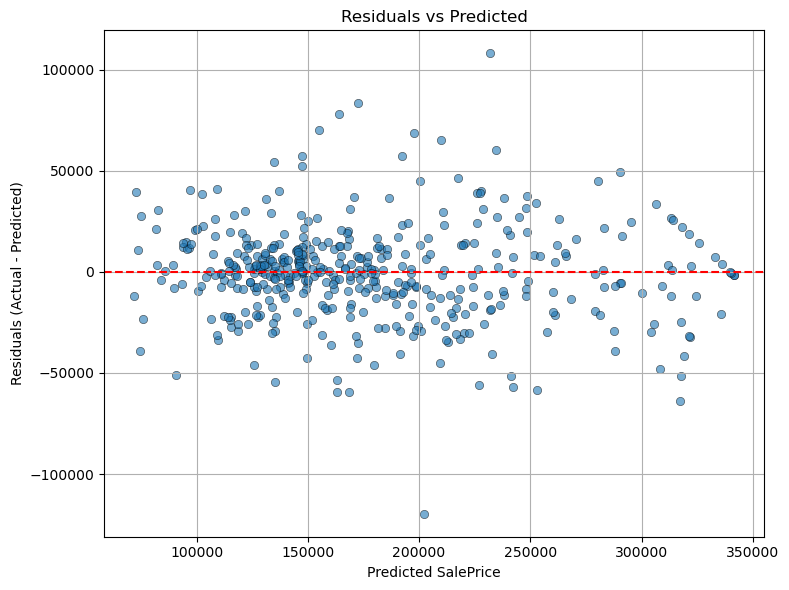

In [438]:
# Residuals
residuals = y_test - y_pred
# Plotting
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

### - look like pattern is random not nearly concentrated to zero which show no bias and  model performance is ok

In [441]:
print(f'Linear Regression model performance {adj_r2_linear:.2f}%' )

Linear Regression model performance 0.85%


## K-Nearest Neighbor Algorithm

In [221]:
# importing KNeighbor Regressor
from sklearn.neighbors import KNeighborsRegressor

In [223]:
#finding best n_neighbor value using error method with MAE
#here the problem is regression so using MAE,MSE,RMSE
error_rate=[]
for i in range (1,21):
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    MAE=mean_absolute_error(y_test, y_pred)
    error_rate.append(MAE)
error_rate

[33539.28082191781,
 28629.83390410959,
 28251.395738203955,
 27283.119863013697,
 26982.07739726027,
 27581.38280060883,
 27369.729288975865,
 27422.101170091326,
 27415.075215626584,
 27337.68093607306,
 27282.793378995433,
 27681.555270167424,
 27714.196347031964,
 28109.381360078274,
 28117.67100456621,
 28292.887557077625,
 28685.678216492077,
 28850.81944444444,
 29083.265501081467,
 29524.536929223745]

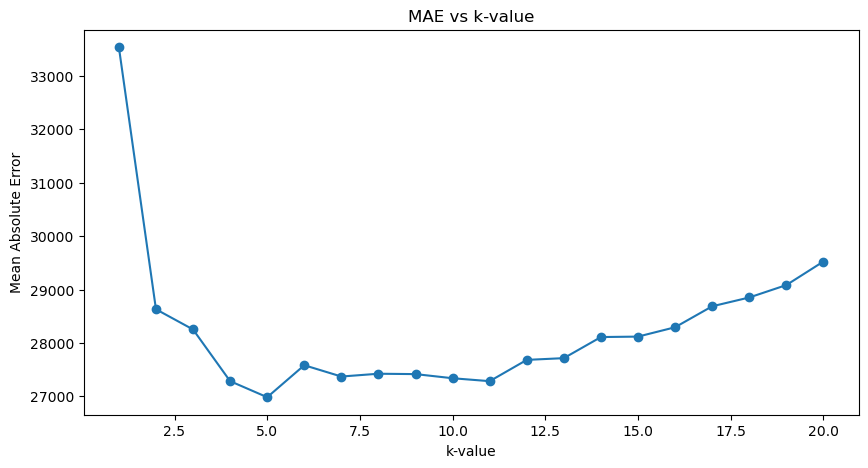

In [225]:
#plotting to find k
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rate, marker='o')
plt.title('MAE vs k-value')
plt.xlabel('k-value')
plt.ylabel('Mean Absolute Error')
plt.show()

### -Here it show the lowest MAE( best performance) on single train and split show k=5 is best 

In [228]:
#importing CV and Gridcv 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [230]:
#finding optimal k value using cross validated r2 score
r2_scores = []
for k in range(1, 21):
    model=KNeighborsRegressor(n_neighbors=k)
    scores=cross_val_score(model,x_train_scaled,y_train,cv=5,scoring='r2')
    r2_scores.append(scores.mean())
r2_scores

[0.6178804092336705,
 0.7016224074714363,
 0.7220900050066504,
 0.73140258523035,
 0.737994983316781,
 0.7393545023761698,
 0.7443336765874287,
 0.7437862121191142,
 0.7490022427829782,
 0.7497148300932969,
 0.7492440123111349,
 0.7483196982756201,
 0.747768817089674,
 0.7465516753633968,
 0.7433504457020644,
 0.743461433603497,
 0.7398902264324271,
 0.7391736270046791,
 0.7371654459006983,
 0.7354222031450985]

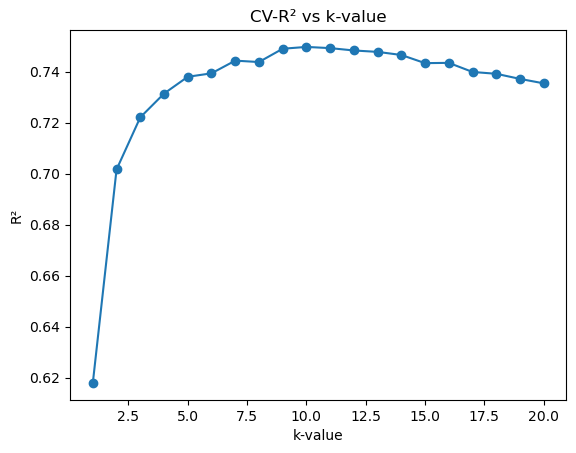

In [232]:
#plotting to find k
plt.plot(range(1, 21), r2_scores, marker='o')
plt.title('CV-R² vs k-value')
plt.xlabel('k-value')
plt.ylabel('R²')
plt.show()

### -Here show value is peak at different points in multiple test of data 

### - because of multiple data test happen here rather than single (error method), r2cv  is consider more generalised

In [236]:
# creating params for Grid cv and finding best_param for knnregressor
params ={'n_neighbors':list(range(5,16)),'weights':['uniform', 'distance'],'metric':['euclidean','manhattan','minkowski'],
         'p':[1, 2],'algorithm':['auto','ball_tree','kd_tree','brute']}

In [238]:
#initializing with grid cv 
grid =GridSearchCV(KNeighborsRegressor(),param_grid=params,cv=5,scoring='r2')
#training 
grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='r2')

In [239]:
print(grid.best_params_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}


In [242]:
#initializing models with best parameters
modelknn=KNeighborsRegressor(algorithm='auto',metric='manhattan',n_neighbors=7, p= 1,weights='distance')
#training the data
modelknn.fit(x_train_scaled,y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=7, p=1, weights='distance')

In [244]:
#predicting
y_pred=modelknn.predict(x_test_scaled)
y_pred

array([222405.48873004, 165148.26583259, 264348.37332746, 179302.21103148,
       274375.6045713 , 112820.5044425 , 124297.07059388, 108065.63117752,
       121718.39521618, 225872.70338544, 111033.73069614, 173238.71160947,
       212493.94768279, 108401.63511133, 135359.600134  , 326282.33768321,
       204240.46232697, 291212.38207211, 337370.94155091, 138781.24700151,
       214040.41076168, 142144.35386417, 127502.05700464, 131429.74361503,
       143665.40769474, 146125.40979616, 237990.89686883, 190866.23761973,
       142579.07652243, 189908.75683973, 121309.61567515, 234475.65626055,
       149326.93152916, 158715.31927741, 165111.95798263, 126870.9187951 ,
       167204.77756375, 229856.52430905, 198641.39124239, 292895.58342042,
       112091.46343056, 114134.33626797, 136521.36731788, 186805.07420085,
       107962.77358065, 110831.16622474, 256484.87389323, 307026.38778532,
       142074.37014473, 188576.27236073, 236913.90989135, 141216.57892299,
       142025.00525634, 1

###  -Model Evalution

In [247]:
#model evalution
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [249]:
print(f'MAE:{mae},MSE:{mse},RMSE:{rmse}')

MAE:19558.534946377273,MSE:775228626.6178426,RMSE:27842.927766631197


In [251]:
#here it knn consider distance based algorithm so x need to scale to 0-1
x_scaled=scaler.fit_transform(x)

In [253]:
# Cross Validation evalution
cv_r2_scores = cross_val_score(modelknn, x_scaled, y, cv=5, scoring='r2')
print(cv_r2_scores.mean())

0.8147743586352807


In [255]:
x_test.shape

(438, 154)

In [257]:
n

65

In [259]:
#adj r2_score
adj_r2_knn=1-(1-0.8147743586352807)*((438-1)/(438-65-1))
adj_r2_knn

0.7824096632355313

In [261]:
print(f'KNeighborRegressor performance {adj_r2_knn:.2f}%' )

KNeighborRegressor performance 0.78%


## Suppor Vector Machine Algorithm

In [264]:
#importing model
from sklearn.svm import SVR

In [266]:
#Here svm consider distance based algorithm so it need scaling
x_scaled=scaler.fit_transform(x)

In [268]:
#spliting the data for train and test
x_train,x_test,y_train,y_test =train_test_split(x_scaled,y,test_size=0.3,random_state=40)

In [270]:
# Tuning SVR with grid CV
param_grid={'C':[0.1,1,10,100],'gamma':[0.001,0.01,1],'kernel':list(['rbf','poly','linear'])}

In [272]:
# intialise the model
model_svr=SVR()

In [274]:
grid_svr=GridSearchCV(model_svr,param_grid,cv=5,scoring='r2',verbose=2)

In [276]:
grid_svr.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 1],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='r2', verbose=2)

In [278]:
#finding the best params
print(grid_svr.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}


In [280]:
#Again intilasing model with best parmeters
model_svr=SVR(C=100,gamma=1.001,kernel='linear')

In [282]:
#training the data
model_svr.fit(x_train_scaled,y_train)

SVR(C=100, gamma=1.001, kernel='linear')

In [284]:
#predicting the test data
y_pred=model_svr.predict(x_test_scaled)
y_pred

array([198787.78039744, 169737.60050469, 269996.27207741, 173244.55121938,
       251145.22203702,  87426.0165201 , 145379.42696815, 101602.51138399,
       113631.0661278 , 207192.08294135,  80415.52144101, 229565.76191479,
       192388.19132707,  96673.04280989, 158273.32830529, 275652.55130384,
       178000.5184659 , 281803.33848191, 355912.81440073, 169621.28015677,
       201465.30159076, 168295.54923404, 132856.33355685, 141569.5669409 ,
       184042.30247101, 132901.65337632, 241921.7582411 , 190525.83790949,
       149234.14084496, 189686.64953766, 117041.77557573, 234412.26399225,
       154059.34225156, 153853.44088708, 164822.45437909, 141740.5367528 ,
       176508.47918822, 240638.73669048, 200270.44775391, 258974.63792723,
        97911.32421421, 122169.79383789, 132801.97969567, 184661.78878068,
        75168.91260942,  83186.33511427, 238630.23925435, 270427.69431941,
       155969.24926378, 198043.12381586, 234521.52327039, 172286.77879948,
       165744.57093715, 1

### -Model Evalution

In [287]:
#mean absolute error ,mean squared error ,root of mse
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [289]:
print(F'MAE:{mae},MSE:{mse},RMSE:{rmse}')

MAE:15489.784702948988,MSE:477792077.0969134,RMSE:21858.455505751394


In [291]:
# Cross Validation evalution
cv_r2_scores = cross_val_score(model_svr,x_scaled,y,cv=5,scoring='r2')
print(cv_r2_scores.mean())

0.8643049903560381


In [293]:
#adj r2_score
adj_r2_svr=1-(1-0.8643049903560381)*((438-1)/(438-65-1))
adj_r2_svr

0.840594840821475

In [295]:
print(f' SVR performance {adj_r2_svr:.2f}%' )

 SVR performance 0.84%


## Decision Tree Regressor

In [298]:
#importing model
from sklearn.tree import DecisionTreeRegressor

In [300]:
#intialising model
model_tree=DecisionTreeRegressor(random_state=42)

In [302]:
#spliting the data for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [304]:
#creating hyperparams for selecting best parameters from gridsearch CV
param= {'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],'splitter': ['best', 'random'],'max_depth': [20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4, 6],'max_features': [None, 'sqrt', 'log2']}

In [306]:
#creating grid search cv
grid_cv = GridSearchCV(estimator=model_tree,param_grid=param,scoring='r2',cv=5,verbose=2,n_jobs=-1)

In [308]:
#training with grid cv
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [20, 30, 40, 50, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=2)

In [310]:
# best parameters
print("Best Parameters:", grid_cv.best_params_)

Best Parameters: {'criterion': 'absolute_error', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


In [312]:
#again intililizing the model with best estimator
best_params=grid_cv.best_estimator_

In [314]:
# training
best_params.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=20,
                      min_samples_leaf=4, random_state=42)

In [316]:
#predicting
y_pred=best_params.predict(x_test)

### - Model Evalution

In [319]:
# Cross Validation evalution
cv_r2_scores = cross_val_score(best_params,x,y,cv=5,scoring='r2')
print(cv_r2_scores.mean())

0.7792430465129268


In [321]:
n

65

In [323]:
#adj r2
adj_r2_tree=1-(1-0.7792430465129268)*((438 - 1)/(438-65-1))
adj_r2_tree

0.7406699229197553

In [325]:
print(f'Decision Tree performance {adj_r2_tree:.2f}%' )

Decision Tree performance 0.74%


## -Random Forest Regressor

In [328]:
#importing the model
from sklearn.ensemble import RandomForestRegressor

In [330]:
#importing randomized search CV
from sklearn.model_selection import RandomizedSearchCV

In [332]:
model_random=RandomForestRegressor(random_state=42)

In [334]:
#spliting the data for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [336]:
#hyper parametering random forest
params={'n_estimators':[100,150,120,180],'max_depth':list(range(50,100)),
        'min_samples_split':[6,12,15,19,21],'min_samples_leaf':[8,12,15,18],
        'max_features':['auto','log2','sqrt'],'bootstrap':[True,False],'max_samples':[0.3,0.5,0.7],'random_state':[4,6,8]}

In [338]:
random_cv=RandomizedSearchCV(model_random,param_distributions=params,scoring='r2',cv=5,verbose=2,n_jobs=-1)

In [340]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 51, 52, 53, 54, 55,
                                                      56, 57, 58, 59, 60, 61,
                                                      62, 63, 64, 65, 66, 67,
                                                      68, 69, 70, 71, 72, 73,
                                                      74, 75, 76, 77, 78, 79, ...],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'max_samples': [0.3, 0.5, 0.7],
                                        'min_samples_leaf': [8, 12, 15, 18],
                                        'min_samples_split': [6, 12, 15, 19,
                                                              21],
                                        'n_estimators': [100, 150, 120, 180],
                                        'random_state': [4, 6, 8]},
                   scoring='r2', verbose=2)

In [341]:
print(random_cv.best_params_)


{'random_state': 6, 'n_estimators': 180, 'min_samples_split': 12, 'min_samples_leaf': 12, 'max_samples': 0.5, 'max_features': 'sqrt', 'max_depth': 52, 'bootstrap': True}


In [344]:
best_params=random_cv.best_estimator_

In [346]:
best_params.fit(x_train,y_train)

RandomForestRegressor(max_depth=52, max_features='sqrt', max_samples=0.5,
                      min_samples_leaf=12, min_samples_split=12,
                      n_estimators=180, random_state=6)

In [348]:
y_pred=best_params.predict(x_test)

### -Model Evaluation

In [351]:
# cross validation
cv_r2_scores = cross_val_score(best_params,x,y,cv=5,scoring='r2')
print(cv_r2_scores.mean())

0.800095317482557


In [445]:
#adj_r2
adj_r2_random=1-(1-0.800095317482557)*((438 - 1)/(438-65-1))
adj_r2_random

0.7651657358598856

In [355]:
print(f'Random Forest model performance {adj_r2_random:.2f}%' )

Random Forest model performance 0.77%


## - Gradient boosting

In [358]:
#importing module
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

In [360]:
gr_boost=GradientBoostingRegressor()

In [362]:
#spliting the data for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [364]:
params={'n_estimators':[100,150,200,250,300],'max_depth':list(range(50,150)),
        'min_samples_split':[6,12,15,19,21,25],'min_samples_leaf':[8,12,15,18,22],
        'max_features':['auto','log2','sqrt',None],'learning_rate':[0.01,0.02,0.04,0.06,0.08],
        'loss':['absolute_error','squared_error']}


In [366]:
random=RandomizedSearchCV(estimator=gr_boost,param_distributions=params,scoring='r2',
                     cv=5,verbose=1,n_iter=50,n_jobs=-1)

In [368]:
random.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.04,
                                                          0.06, 0.08],
                                        'loss': ['absolute_error',
                                                 'squared_error'],
                                        'max_depth': [50, 51, 52, 53, 54, 55,
                                                      56, 57, 58, 59, 60, 61,
                                                      62, 63, 64, 65, 66, 67,
                                                      68, 69, 70, 71, 72, 73,
                                                      74, 75, 76, 77, 78, 79, ...],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'min_samples_leaf': [8, 12, 15, 18, 22],
                                        'min_samples_split': [6, 12, 15, 19, 21,
                                                              25],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   scoring='r2', verbose=1)

In [370]:
print(random.best_params_)

{'n_estimators': 300, 'min_samples_split': 19, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 53, 'loss': 'squared_error', 'learning_rate': 0.06}


In [372]:
best_params_gb=random.best_estimator_

In [374]:
best_params_gb.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.06, max_depth=53, max_features='sqrt',
                          min_samples_leaf=15, min_samples_split=19,
                          n_estimators=300)

In [376]:
y_pred=best_params_gb.predict(x_test)

In [378]:
#cross validation evalution
cv_r2_scores = cross_val_score(best_params_gb,x,y,cv=5,scoring='r2')
print(cv_r2_scores.mean())

0.9054166680069509


In [380]:
#adj_r2
adj_r2_gb=1-(1-0.9054166680069509)*((438-1)/(438-65-1))
adj_r2_gb

0.8888900105350471

In [382]:
print(f'Gradient boost model performance {adj_r2_gb:.2f}%' )

Gradient boost model performance 0.89%


## -Xg boosting

In [385]:
#importing model
from xgboost import XGBRegressor

In [387]:
xgboost=XGBRegressor()

In [389]:
#spliting the data for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [391]:
param={'n_estimators':[100,150,200,250],'max_depth':list(range(30,100)),'learning_rate': [0.01,0.05, 0.1],
       'gamma': [0,1,2,3],'reg_lambda': [1,2,6,8],'reg_alpha': [0,1,2]}

In [393]:
#intializing random cv
randomxg=RandomizedSearchCV(estimator=xgboost,param_distributions=param,scoring='r2',cv=5,verbose=2,n_iter=50,n_jobs=-1)

In [395]:
randomxg.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'gamma': [0, 1, 2, 3],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [30, 31, 32, 33, 34, 35,
                                                      36, 37, 38, 39, 40, 41,
                                                      42, 43, 44, 45, 46, 47,
                                                      48, 49, 50, 51, 52, 53,
                                                      54, 55, 56, 57, 58, 59, ...],
                                        'n_estimators': [100, 150, 200, 250],
                                        'reg_alpha': [0, 1, 2],
                                        'reg_lambda': [1, 2, 6, 8]},
                   scoring='r2', verbose=2)

In [407]:
print(randomxg.best_params_)

{'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 250, 'max_depth': 76, 'learning_rate': 0.05, 'gamma': 3}


In [409]:
best_params=randomxg.best_estimator_

In [411]:
best_params.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=3, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=76,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=250,
             n_jobs=None, num_parallel_tree=None, ...)

In [412]:
y_pred=best_params.predict(x_test)

In [413]:
#cross validation evalution
cv_r2_scores = cross_val_score(best_params,x,y,cv=5,scoring='r2')
print(cv_r2_scores.mean())

0.864770353096794


In [417]:
#adj_r2
adj_r2_xg=1-(1-0.864770353096794)*((438-1)/(438-65-1))
adj_r2_xg

0.841141516944352

In [419]:
print(f'XG boost model performance {adj_r2_xg:.2f}%' )

XG boost model performance 0.84%


In [447]:
model_score={"Linear Regression(lassocv)":0.85,"KNN Regressor":0.78,'SVR':0.84,'DecisionTree Regressor':0.74,
                "RandomForest Regressor":0.77,"Gradient Boosting":0.89,"XGBoost":0.84}

In [449]:
ML_scores = pd.DataFrame((model_score.items()),columns=["Model","Adjusted R² Score"])
print(ML_scores)


                        Model  Adjusted R² Score
0  Linear Regression(lassocv)               0.85
1               KNN Regressor               0.78
2                         SVR               0.84
3      DecisionTree Regressor               0.74
4      RandomForest Regressor               0.77
5           Gradient Boosting               0.89
6                     XGBoost               0.84


### -Here the highest score goes to Gradient boosting which study 89% of data this model is used for predicting cutomer preferences

In [452]:
#using inbuild feature_importance method which give best score of gradient model
importances=best_params_gb.feature_importances_
features=x_test.columns

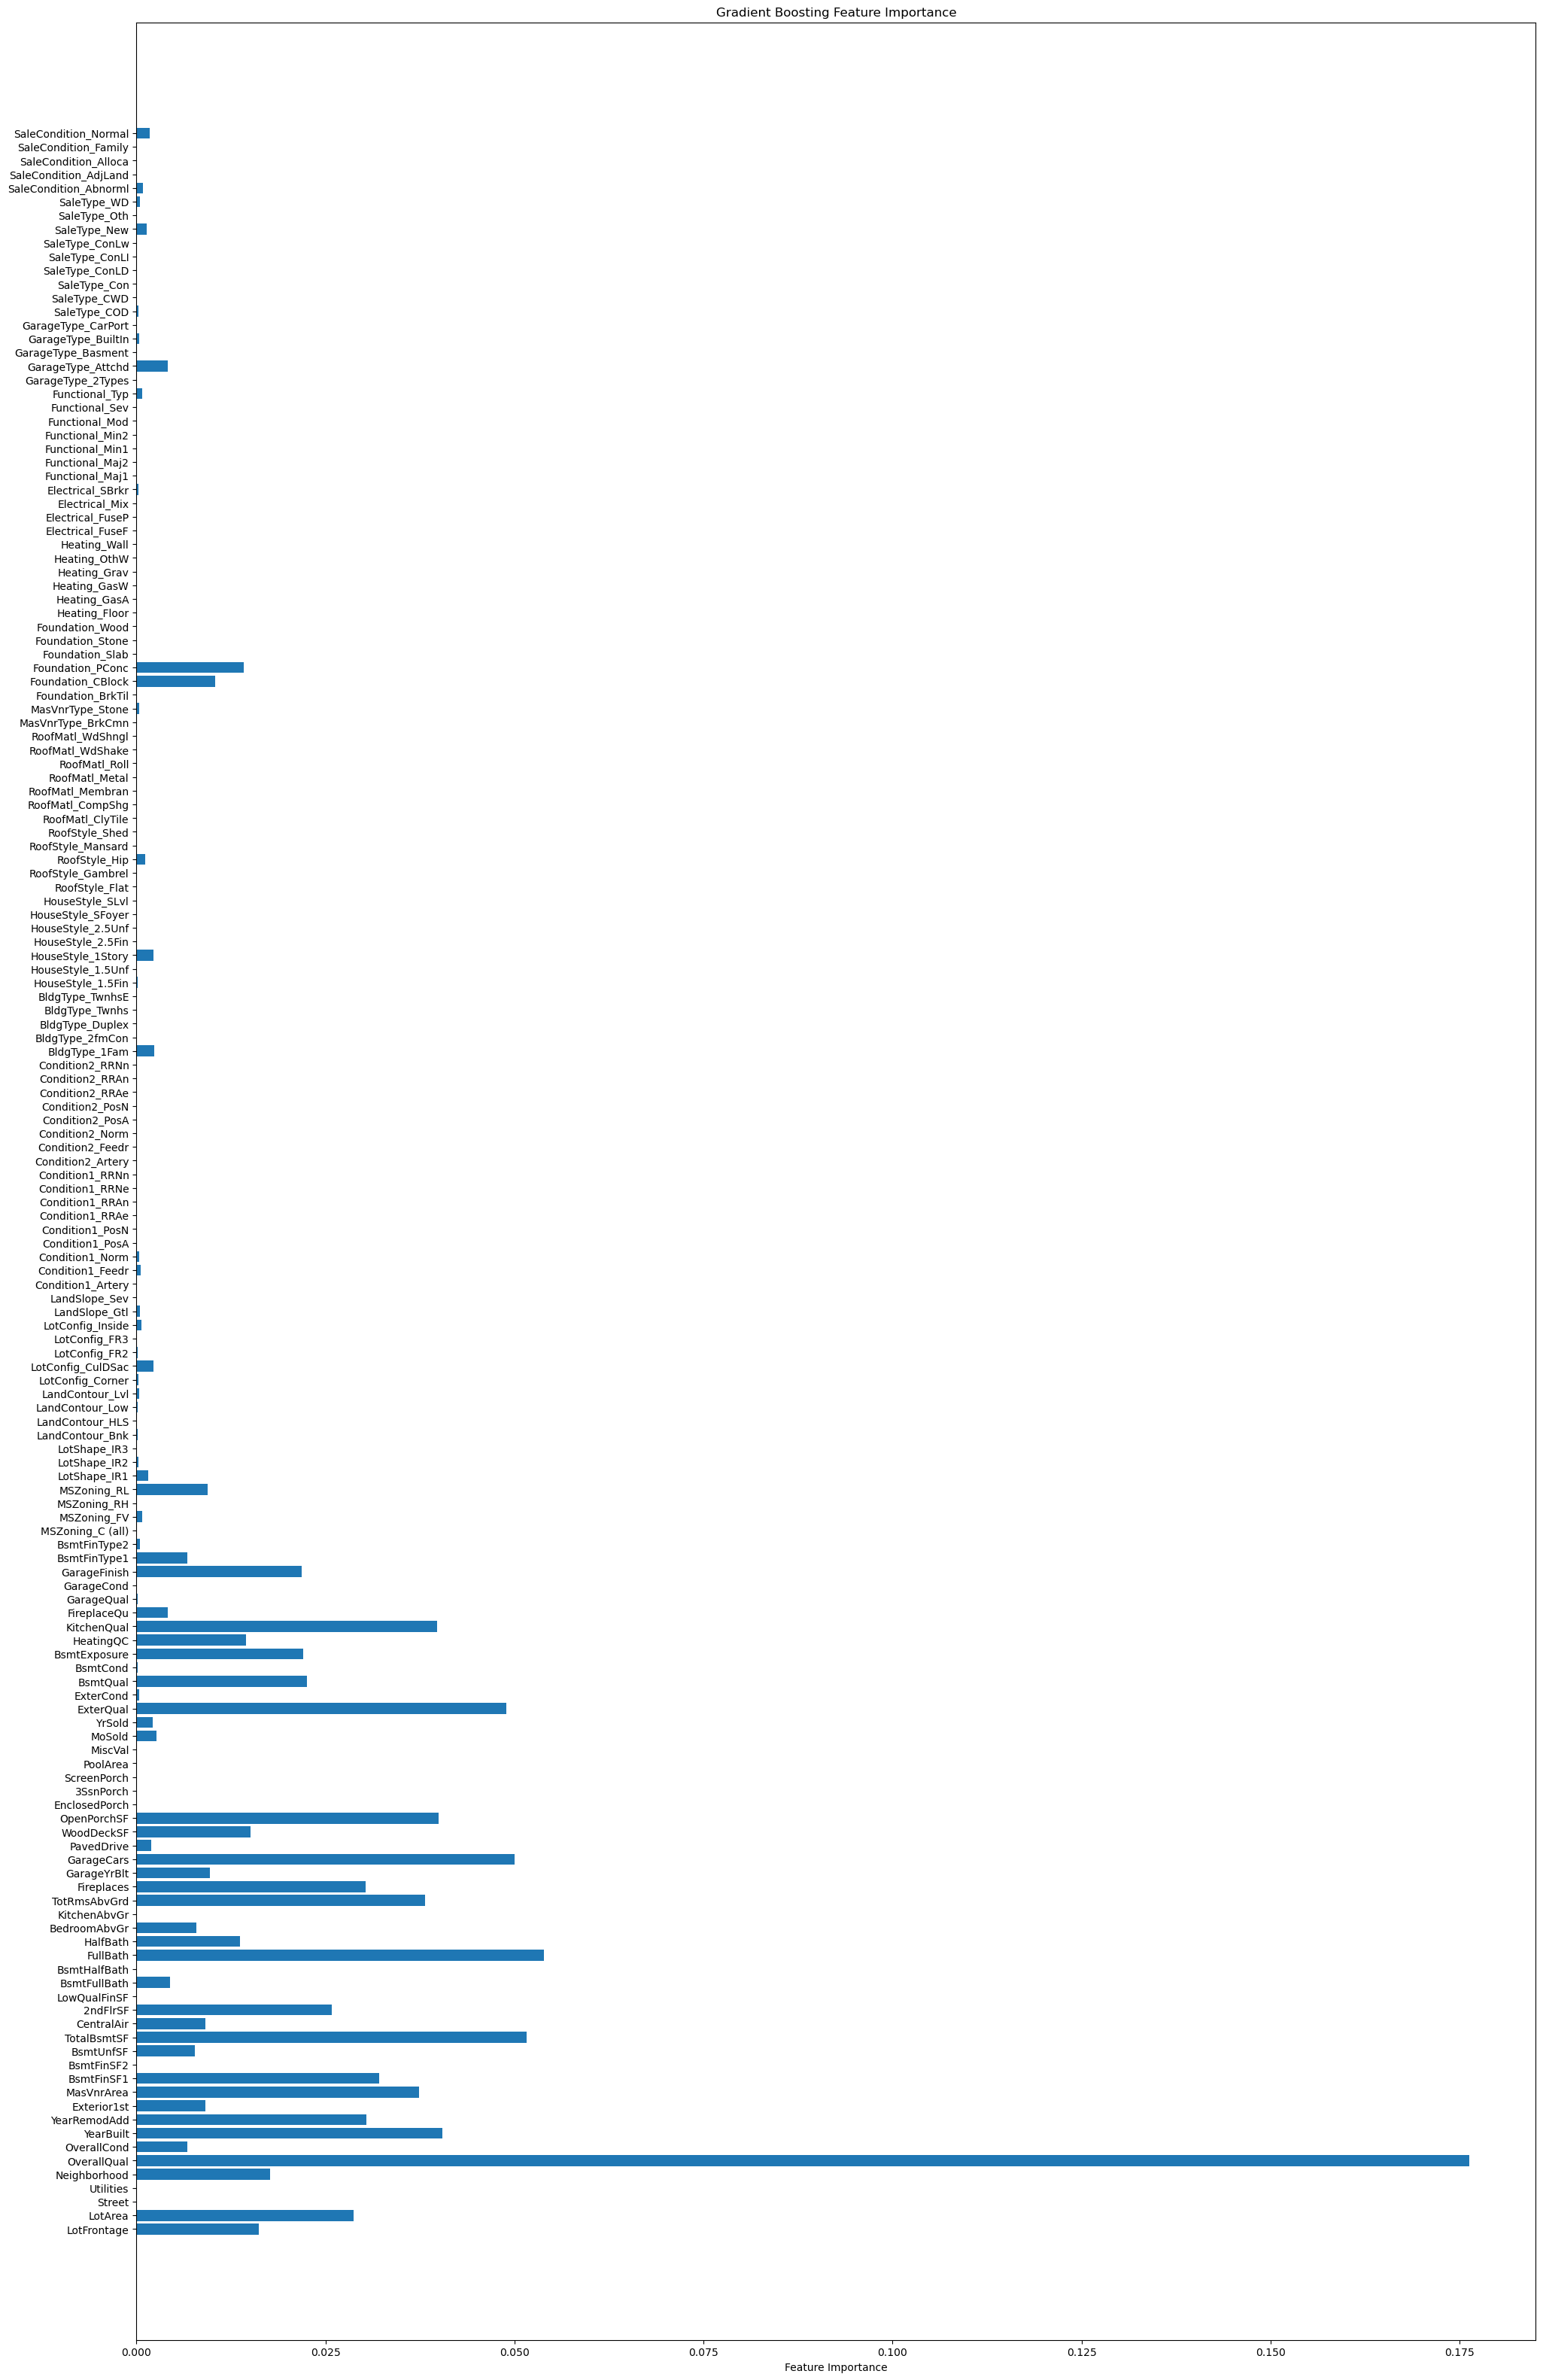

In [454]:
# Plotting using matplot 
plt.figure(figsize=(24,40))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")
plt.show()

### - these are the best features which can be used for customer preferences totalBsmtSF,Overall_Qual,ExterQual,kitchenQual,garagecars

In [495]:
#creating function for recommentation of customer
def recommend_houses_model(data,model,fullbath_min,exterQual,totalbsmtsf_min,YearBuilt,overallqual_min, garagecars_min, kitchenqual_min,top_n):
# filtering using user preferences
    filtered = data[
        (data['ExterQual']>=exterQual)&
        (data['FullBath']>= fullbath_min) &
        (data['TotalBsmtSF']>=totalbsmtsf_min)&
        (data['OverallQual'] >= overallqual_min) &
        (data['YearBuilt']>=YearBuilt)&
        (data['GarageCars']>=garagecars_min) &
        (data['KitchenQual']>=kitchenqual_min)].copy()
    if filtered.empty:
        print("No houses found with the given criteria.")
        return pd.DataFrame()
# Match exact features used during model training
    model_features=best_params_gb.feature_names_in_
    try:
        x_filtered=filtered[model_features]
    except KeyError as e:
        print("Missing features:",e)
        return pd.DataFrame()
# Predict price
    filtered['PredictedPrice'] = best_params_gb.predict(x_filtered)
# Sort and recommend
    return filtered.sort_values(by='PredictedPrice').head(top_n)

In [497]:
#customised preference of customer
recommendations=recommend_houses_model(data=data,model=best_params_gb,fullbath_min=1,YearBuilt=2000,totalbsmtsf_min=800,exterQual=3,overallqual_min=5,
                                              garagecars_min=1,kitchenqual_min=3,top_n=8)
#recommentations from features
print(recommendations[['YearBuilt','TotalBsmtSF','FullBath','ExterQual','OverallQual','GarageCars','KitchenQual','PredictedPrice']])

      YearBuilt  TotalBsmtSF  FullBath  ExterQual  OverallQual  GarageCars  \
117      2006.0       1125.0         1        3.0          5.0         2.0   
880      2005.0       1090.0         1        3.0          5.0         2.0   
1108     2000.0        924.0         2        3.0          6.0         2.0   
370      2000.0        953.0         2        3.0          6.0         2.0   
1167     2000.0        959.0         2        3.0          6.0         2.0   
1401     2004.0        839.0         2        3.0          6.0         2.0   
742      2000.0       1349.0         2        3.0          7.0         2.0   
379      2000.0        982.0         2        3.0          6.0         2.0   

      KitchenQual  PredictedPrice  
117           3.0   147125.045418  
880           3.0   160429.790091  
1108          3.0   171907.004922  
370           3.0   172555.360513  
1167          3.0   175323.345646  
1401          3.0   175460.383772  
742           3.0   177835.458378  
379      

## - conclussion
### - loaded the dataset into jupyter notebook and did basic checks like (head,info,describe...).
### - Then i do EDA for data analysis, to extract useful information from dataset i used to plot with important features and compare with saleprice
### - after goes for data preprocessing finding outliers, some of the features have more than 80 % outlier so i drop it and impute others with median         and mode because mostly none value found in categorical data.
### - when it come to the categarical data there is different cardinality shows so import appropriate encoders like onehot, label, ordinal and                frequency map use of onehot encoding about more than 20 feature which increase the dimensional so features 81 increase to 154 use of one hot            encoder because these features does not have logical order.
### - Because of the high features the correlation capture same behaviour data so i have to do important steps like
### - To find multicollinearity of data which pair have the highly correlation between each other i use np.triu which is helpfull in this sitution            where i have to a pattern of upper triangle of matrix to avoid repeating check of combination and use k to exclude diagonal and find the pair of        two column by use for loop and select one of less important features and remove it from data.
### - Then import the important modules for ML models, scaling and train and split.
### - After find r2 and adjr2 in Linear regresssion there a very value gap between these evalution so i think there is more which features are not            necessary or to improve the model i use lassocv a regularization which help do reduce features using lassocoefficient=0 then the features are           reduce 154 to 65 after the score perform well.
### - Then to check the model performance i use residual which is good for finding overfitting and underfitting but the plot shows patter which is not        focused on center point and doted point are not shattered across which shows good modelling.
### - After lassocv i find KNN did two method error rate using Mean Absolute Error because of regression problem so this method is single train and           split so i did multiple train and split CVr2 method and create params for KNN and run the gridCV and then fitted with best parameter and                predicted it too.
### - In support vector Regressor i tuned with differet parameter and find the best params and again intialise with best parameter then train and             predict the data.
### - In every model evaluation i used cross validated r2 score rather than r2 because CVr2 create multiple split and train and test multiple times.
### - Gridsearch cv and Randomized cv is used appropriate models
### - Then i did Decision Tree and Random forest with the exact way that describe SVR.
### - using of Gradient Boosting and xgboost these ensemble model of decision tree but Gradient Boosting give the best model performance about 89%            score.
### - finding best features using inbuild model.features_importance method plot it  with x_test columns
### - Then i create a funtion for customized customer opinion to find the house based on their preferences from the selected best features